# TRF solver comparison
## Benchmarkfile: Tests/Data/ThermoRichardsFlow/SimplifiedMechanics/TRuni_unsaturated.prj

In [1]:
from ogs6py.ogs import OGS

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [23]:
import plot_settings

In [5]:
directory = "../data/sims/TRF"

In [6]:
m = OGS()

PROJECT_FILE not given. Calling it default.prj.


### Read in STDOUT

In [8]:
output_eigen = m.parse_out(directory+"/ogs_eigen.out")

In [16]:
output_petsc = m.parse_out(directory+"/ogs_petsc.out", petsc=True)

In [17]:
output_eigen

execution_time  time_step/number  time_step/t  time_step/dt  \
0         0.027619                 1          0.1           0.1   
1         0.027619                 1          0.1           0.1   
2         0.027619                 1          0.1           0.1   
3         0.027619                 1          0.1           0.1   
4         0.027619                 1          0.1           0.1   
..             ...               ...          ...           ...   
75        0.027619                10          1.0           0.1   
76        0.027619                10          1.0           0.1   
77        0.027619                10          1.0           0.1   
78        0.027619                10          1.0           0.1   
79        0.027619                10          1.0           0.1   

    time_step/cpu_time  time_step/output_time  \
0             0.001393               0.001084   
1             0.001393               0.001084   
2             0.001393               0.001084   
3             0.001393               0.001084   
4             0.001393               0.001084   
..                 ...                    ...   
75            0.001341               0.001029   
76            0.001341               0.001029   
77            0.001341               0.001029   
78            0.001341               0.001029   
79            0.001341               0.001029   

    time_step/iteration_proc0/number  time_step/iteration_proc0/assembly_time  \
0                                  1                                 0.000392   
1                                  1                                 0.000392   
2                                  2                                 0.000272   
3                                  2                                 0.000272   
4                                  3                                 0.000270   
..                               ...                                      ...   
75                                 2                                 0.000267   
76                                 3                                 0.000267   
77                                 3                                 0.000267   
78                                 4                                 0.000266   
79                                 4                                 0.000266   

    time_step/iteration_proc0/dirichlet_bc_time  \
0                                      0.000008   
1                                      0.000008   
2                                      0.000006   
3                                      0.000006   
4                                      0.000006   
..                                          ...   
75                                     0.000006   
76                                     0.000005   
77                                     0.000005   
78                                     0.000005   
79                                     0.000005   

   time_step/iteration_proc0/linear_solver_time  \
0                                          None   
1                                          None   
2                                          None   
3                                          None   
4                                          None   
..                                          ...   
75                                         None   
76                                         None   
77                                         None   
78                                         None   
79                                         None   

    time_step/iteration_proc0/cpu_time  \
0                             0.000446   
1                             0.000446   
2                             0.000308   
3                             0.000308   
4                             0.000304   
..                                 ...   
75                            0.000303   
76                            0.000300   
77                            0.0

In [18]:
output_petsc

execution_time  time_step/number  time_step/t  time_step/dt  \
0         0.082152                 1          0.1           0.1   
1         0.082152                 1          0.1           0.1   
2         0.082152                 1          0.1           0.1   
3         0.082152                 1          0.1           0.1   
4         0.082152                 1          0.1           0.1   
..             ...               ...          ...           ...   
79        0.082152                10          1.0           0.1   
80        0.082152                10          1.0           0.1   
81        0.082152                10          1.0           0.1   
82        0.082152                10          1.0           0.1   
83        0.082152                10          1.0           0.1   

    time_step/cpu_time  time_step/output_time  \
0             0.009834               0.001218   
1             0.009834               0.001218   
2             0.009834               0.001218   
3             0.009834               0.001218   
4             0.009834               0.001218   
..                 ...                    ...   
79            0.006089               0.001287   
80            0.006089               0.001287   
81            0.006089               0.001287   
82            0.006089               0.001287   
83            0.006089               0.001287   

    time_step/iteration_proc0/number  time_step/iteration_proc0/assembly_time  \
0                                  1                                 0.001073   
1                                  1                                 0.001073   
2                                  2                                 0.000931   
3                                  2                                 0.000931   
4                                  3                                 0.000885   
..                               ...                                      ...   
79                                 2                                 0.000900   
80                                 3                                 0.000891   
81                                 3                                 0.000891   
82                                 4                                 0.000994   
83                                 4                                 0.000994   

    time_step/iteration_proc0/dirichlet_bc_time  \
0                                      0.000027   
1                                      0.000027   
2                                      0.000022   
3                                      0.000022   
4                                      0.000020   
..                                          ...   
79                                     0.000021   
80                                     0.000020   
81                                     0.000020   
82                                     0.000022   
83                                     0.000022   

    time_step/iteration_proc0/linear_solver_time  \
0                                       0.001583   
1                                       0.001583   
2                                       0.000493   
3                                       0.000493   
4                                       0.000443   
..                                           ...   
79                                      0.000444   
80                                      0.000449   
81                                      0.000449   
82                                      0.000458   
83                                      0.000458   

    time_step/iteration_proc0/cpu_time  \
0                             0.002717   
1                             0.002717   
2                             0.001477   
3                             0.001477   
4                             0.001377   
..                                 ...   
79                            0.001393   
80                            0.001388   
81                   

In [19]:
eigen_numiterations = output_eigen.drop_duplicates(subset ="time_step/number", keep = "last")

In [20]:
petsc_numiterations = output_petsc.drop_duplicates(subset ="time_step/number", keep = "last")

Text(0, 0.5, 'number of iterations')

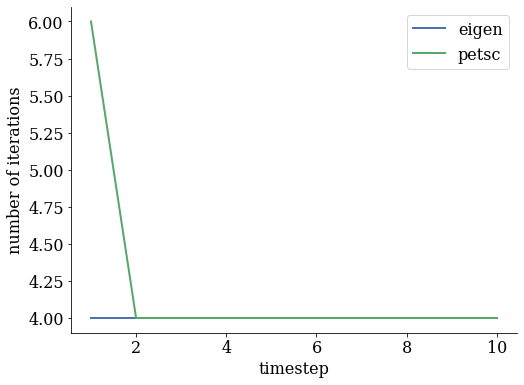

In [74]:
plt.plot(eigen_numiterations["time_step/number"], eigen_numiterations["time_step/iteration_proc0/number"], label="eigen")
plt.plot(petsc_numiterations["time_step/number"], petsc_numiterations["time_step/iteration_proc0/number"], label="petsc")
plt.legend()
plt.xlabel("timestep")
plt.ylabel("number of iterations")

In [42]:
eigen_temp = output_eigen[output_eigen["time_step/iteration_proc0/component_convergence/number"]==0]
petsc_temp = output_petsc[output_petsc["time_step/iteration_proc0/component_convergence/number"]==0]

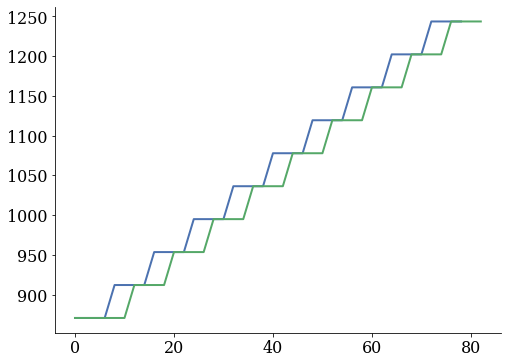

In [43]:
plt.plot(eigen_temp["time_step/iteration_proc0/component_convergence/x"])
plt.plot(petsc_temp["time_step/iteration_proc0/component_convergence/x"])

In [44]:
eigen_press = output_eigen[output_eigen["time_step/iteration_proc0/component_convergence/number"]==1]
petsc_press = output_petsc[output_petsc["time_step/iteration_proc0/component_convergence/number"]==1]

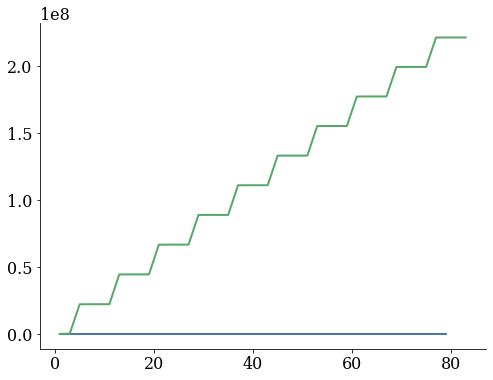

In [47]:
plt.plot(eigen_press["time_step/iteration_proc0/component_convergence/x"])
plt.plot(petsc_press["time_step/iteration_proc0/component_convergence/x"])

### Read in Jacobian

In [48]:
jac_eigen_file = directory+"/jacobian_eigen.out"
jac_petsc_file = directory+"/jacobian_petsc.out"

In [66]:
def parse_jacobian(inputfile, petsc=True):
    Jac = {}
    Jacsize = 16
    validfirstcolumn = [str(i) for i in range(Jacsize+1)]
    for i in range(Jacsize):
        Jac[i] = {}
        for j in range(Jacsize):
            Jac[i][j] = []
    if petsc is True:
        offset = 1
    else:
        offset = 0
    with open(inputfile, 'r') as infile:
        for line in infile:
            linelist = line.split()
            try:
                if linelist[0] in validfirstcolumn:
                    Jac[int(linelist[0])-offset][int(linelist[1].split(":")[0])-offset].append(float(linelist[2]))
            except IndexError:
                    pass           
                
    return Jac        

In [67]:
jac_eigen = parse_jacobian(jac_eigen_file, petsc=False)

In [70]:
jac_petsc = parse_jacobian(jac_petsc_file, petsc=True)

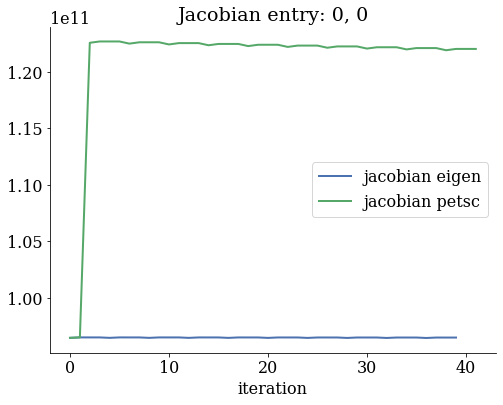

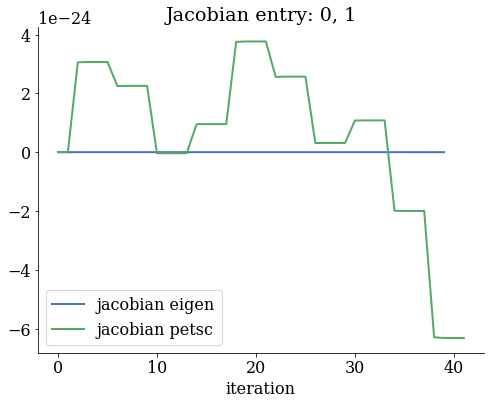

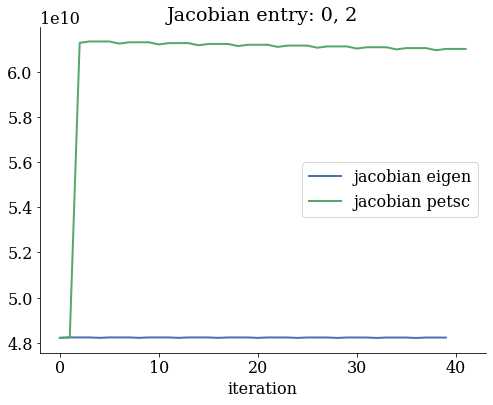

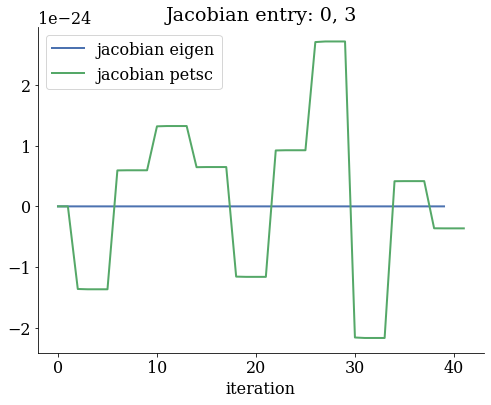

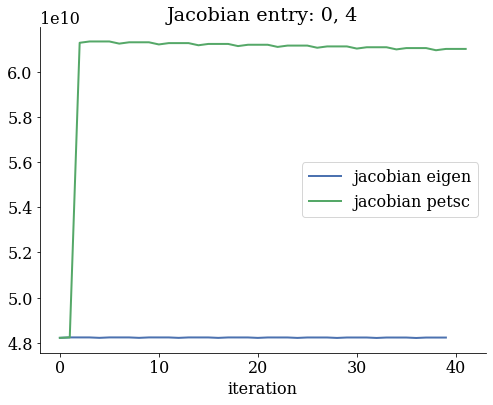

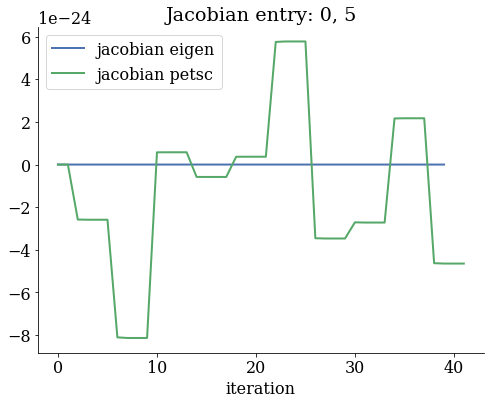

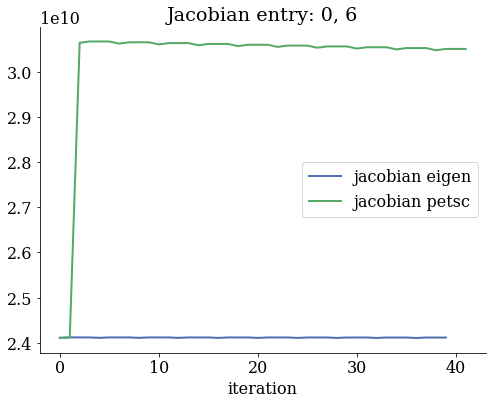

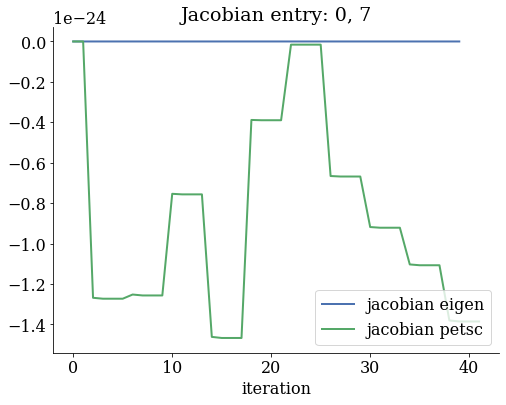

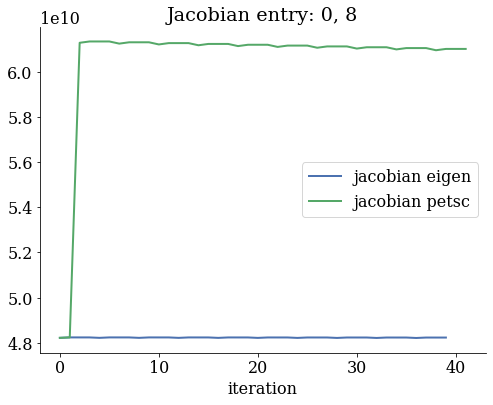

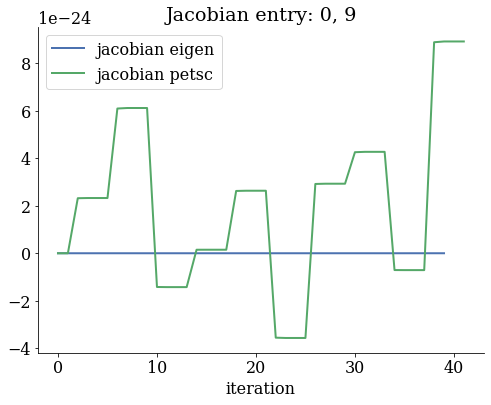

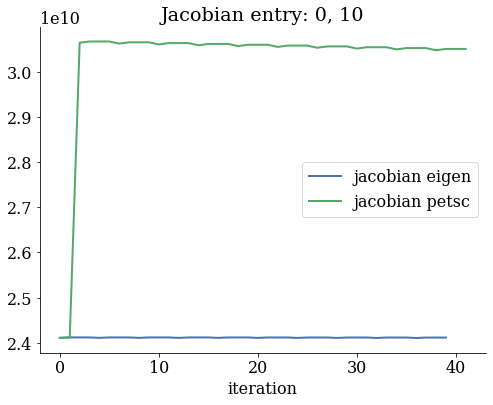

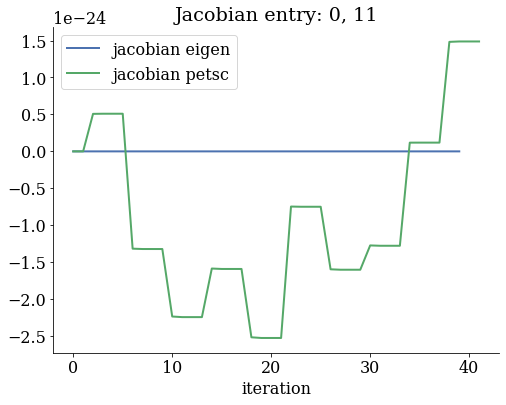

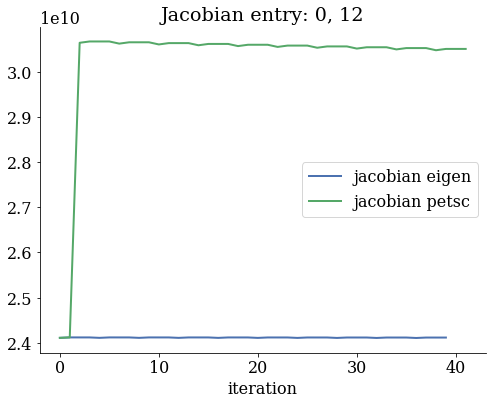

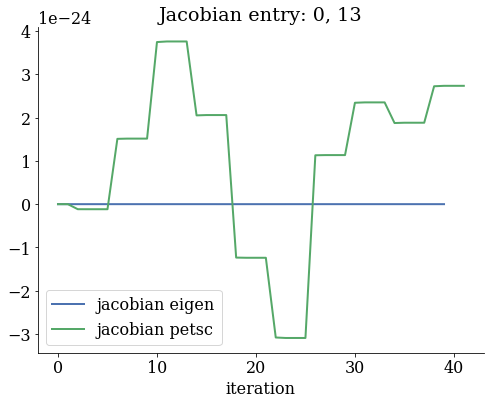

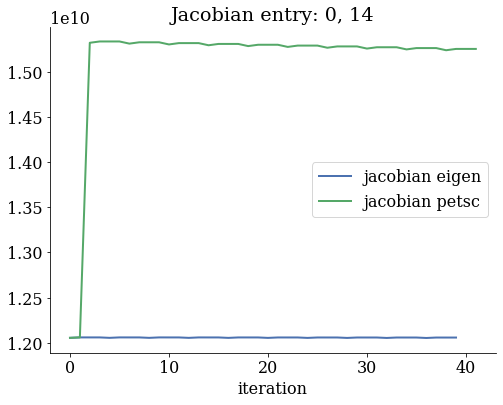

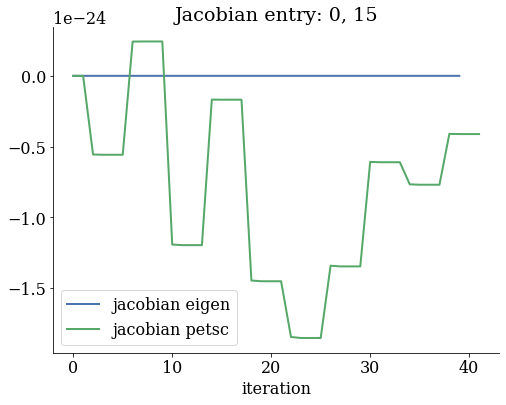

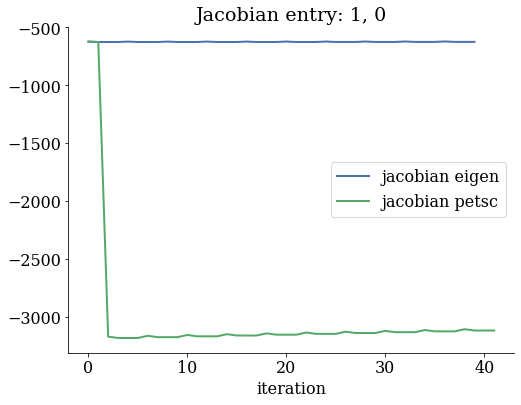

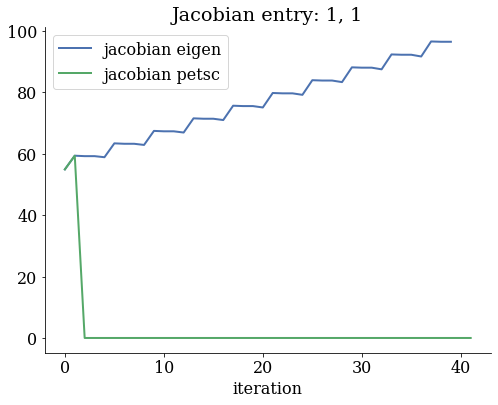

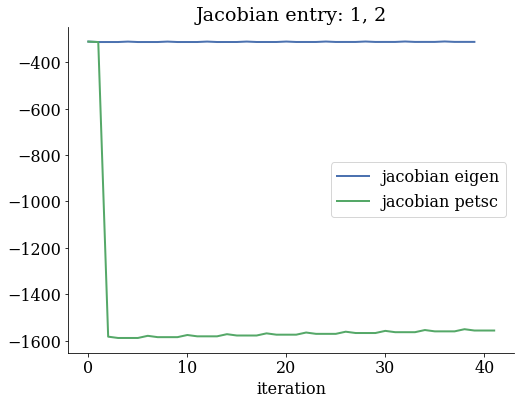

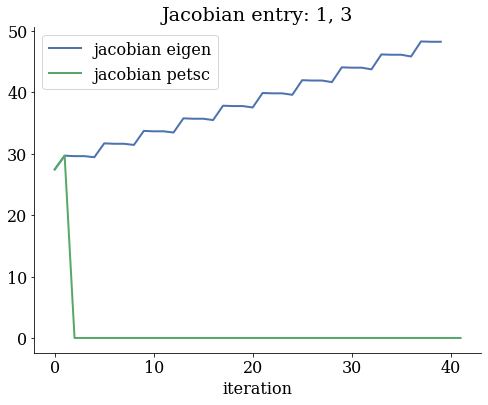

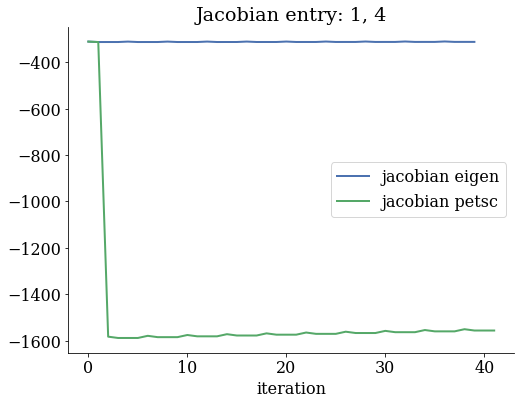

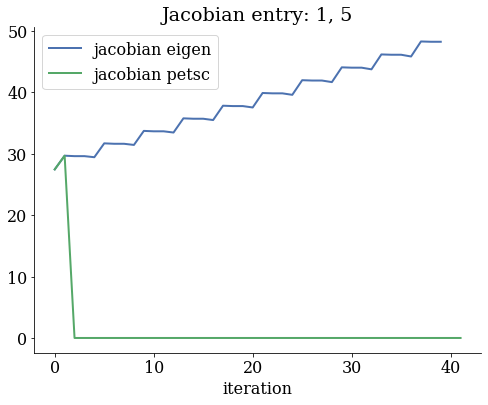

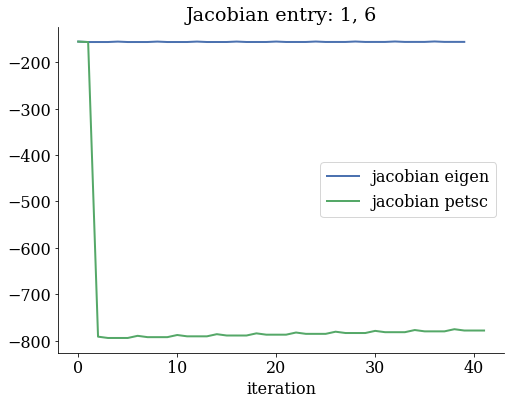

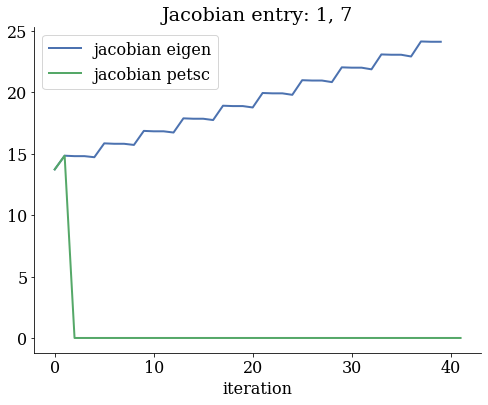

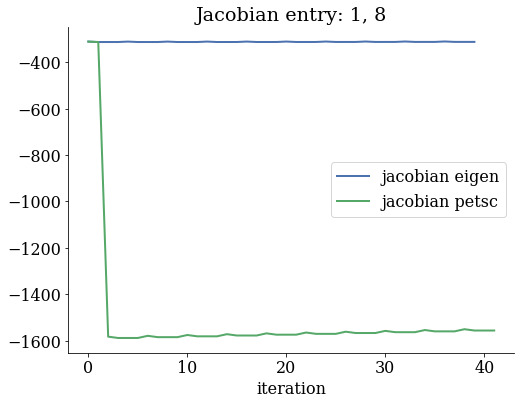

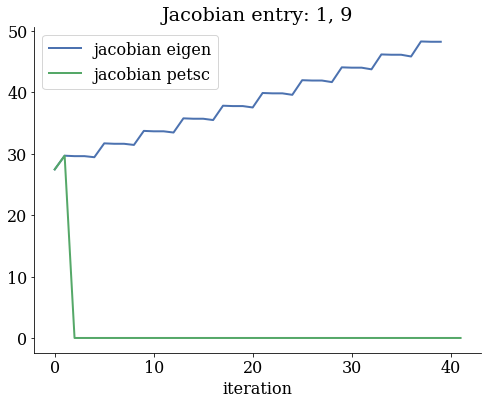

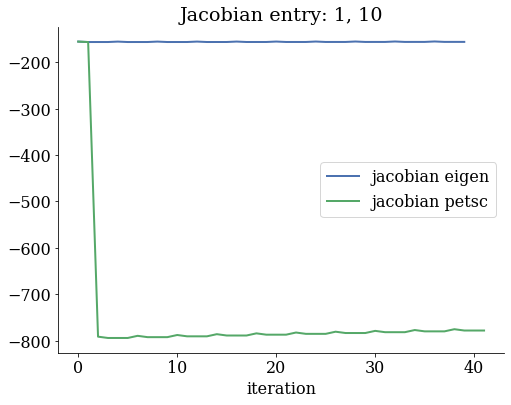

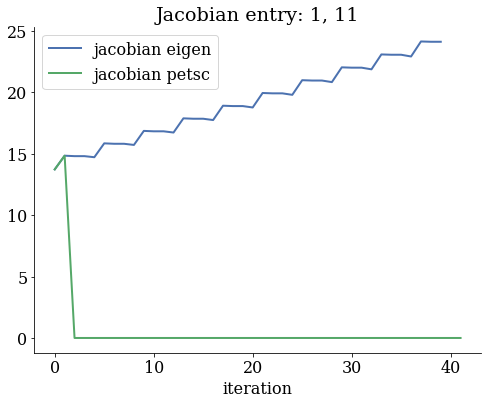

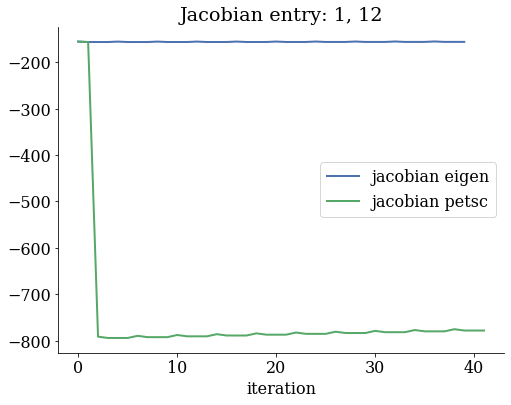

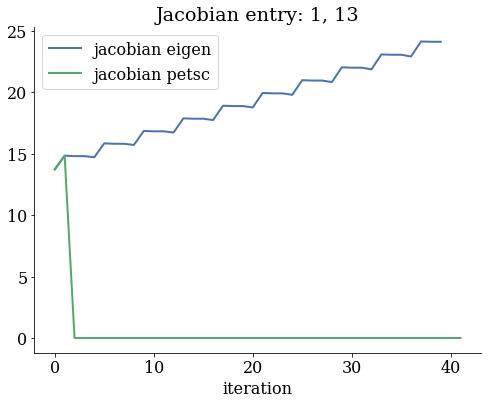

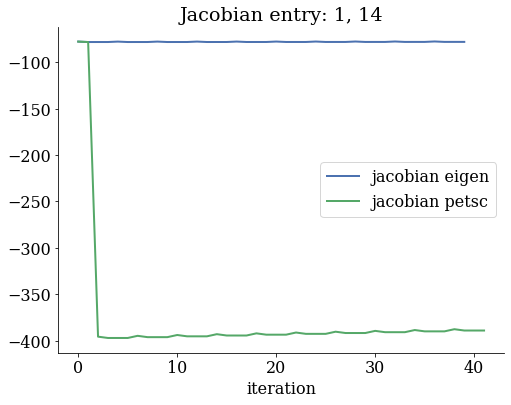

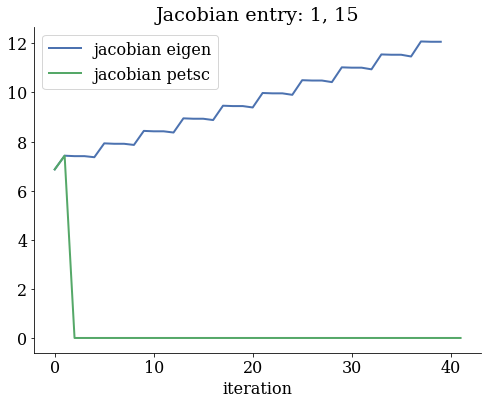

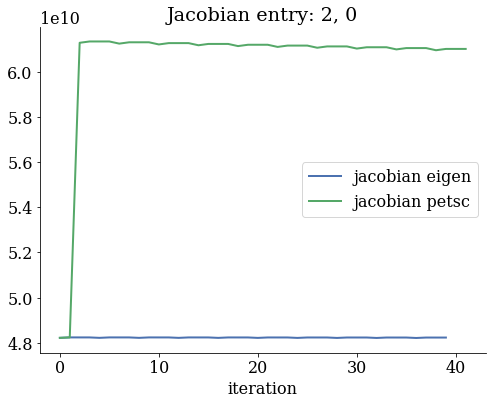

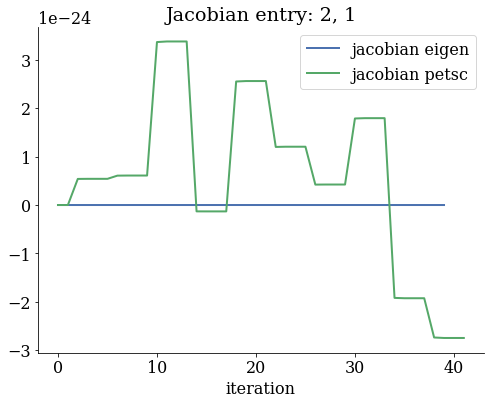

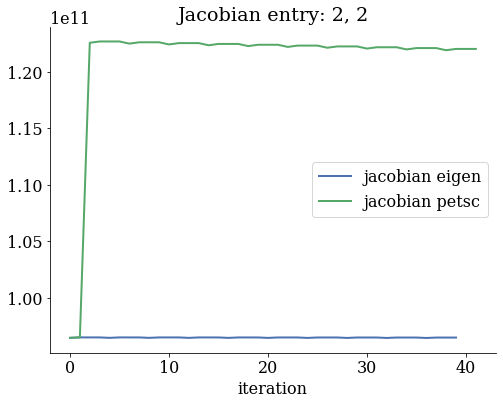

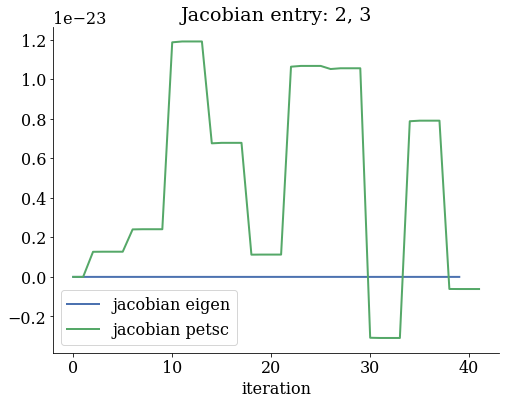

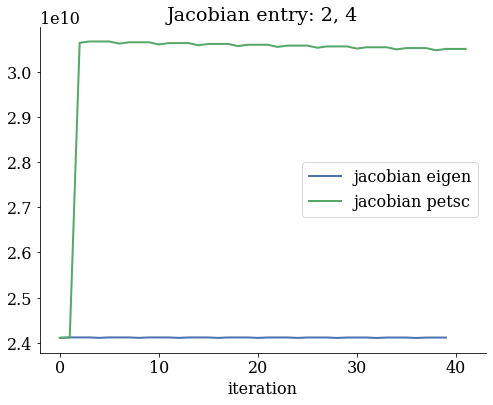

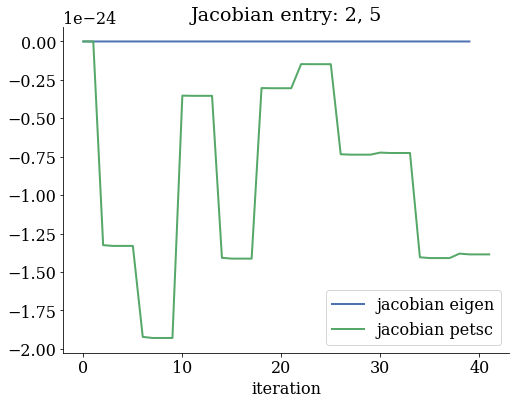

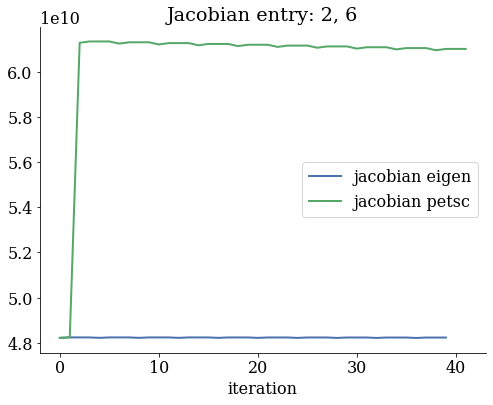

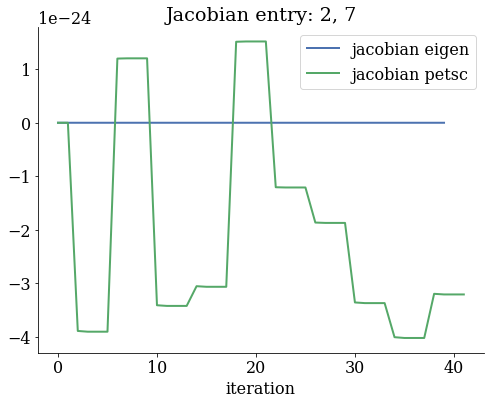

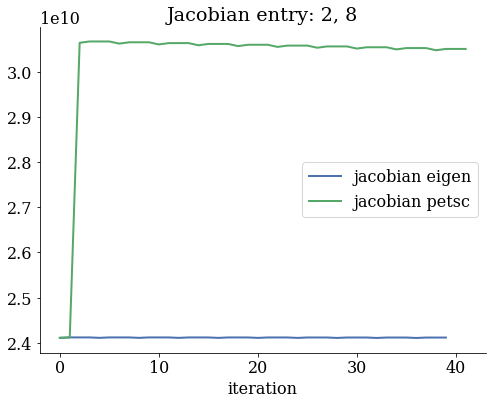

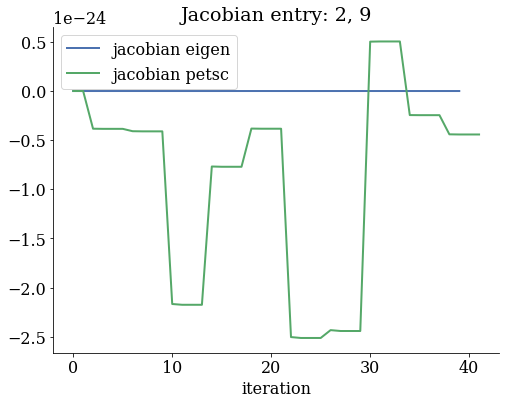

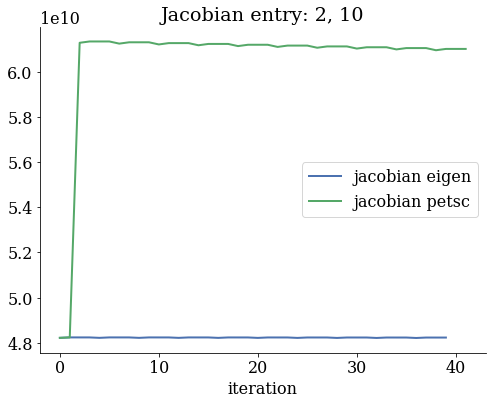

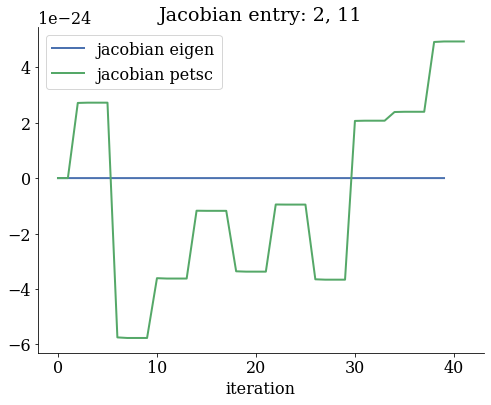

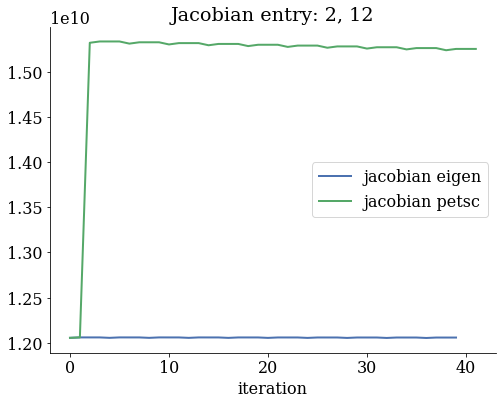

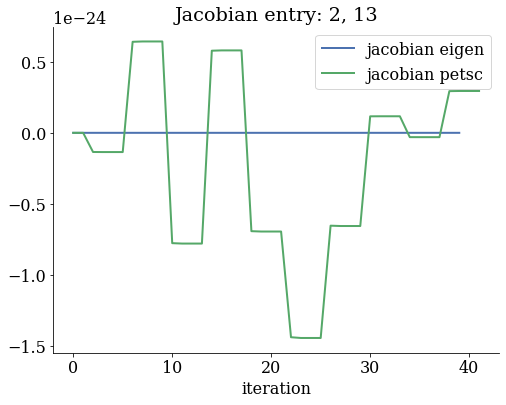

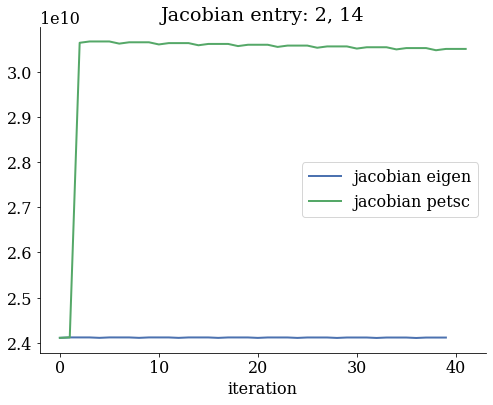

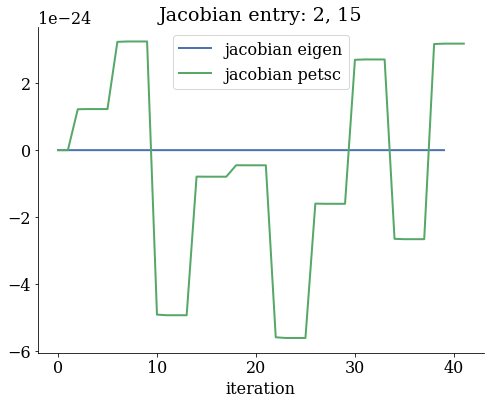

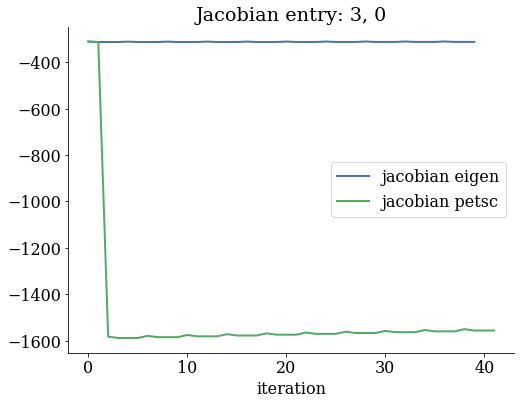

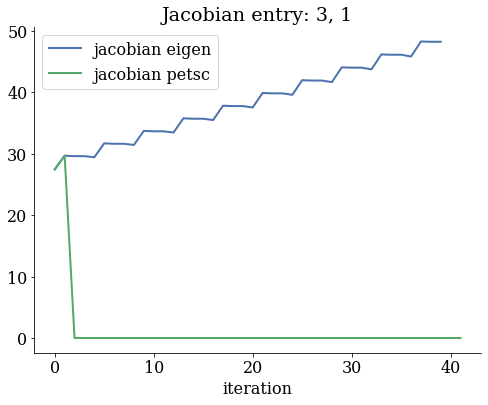

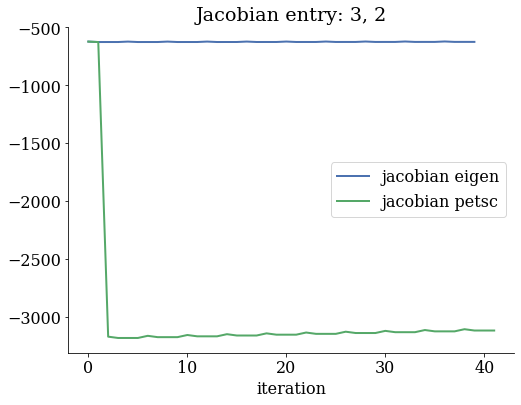

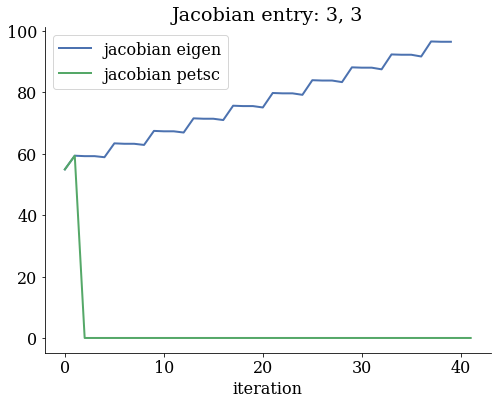

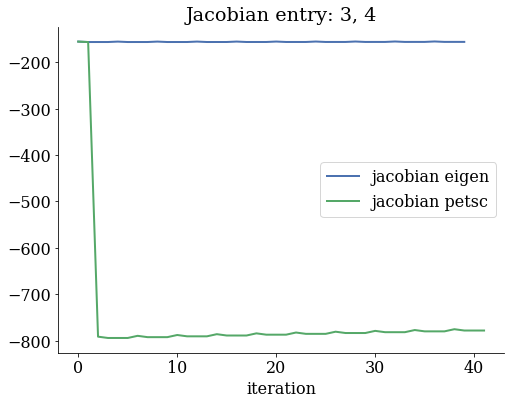

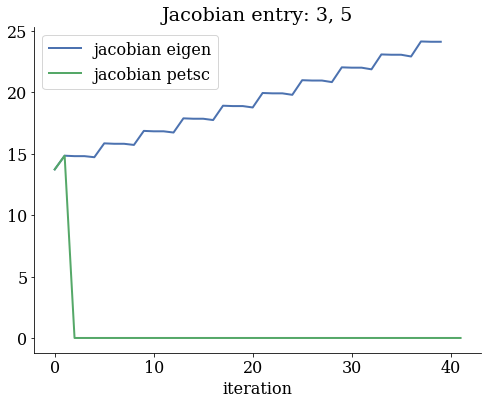

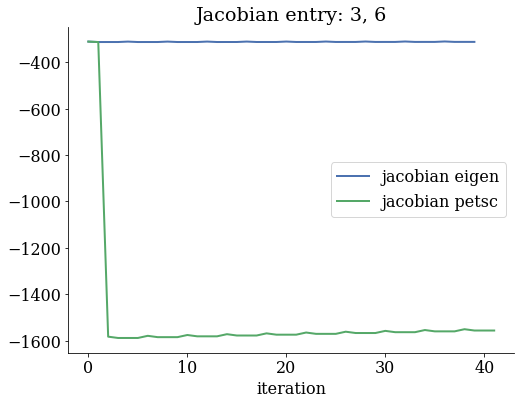

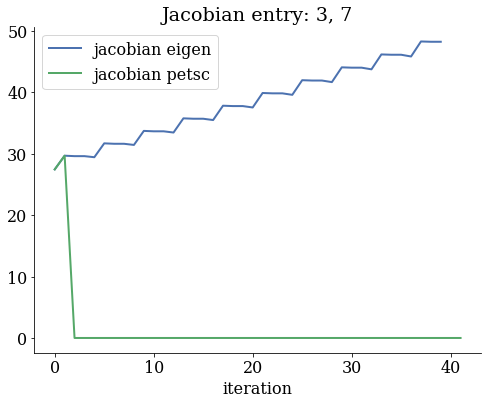

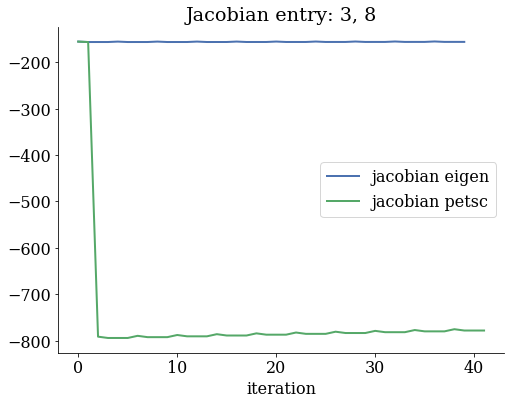

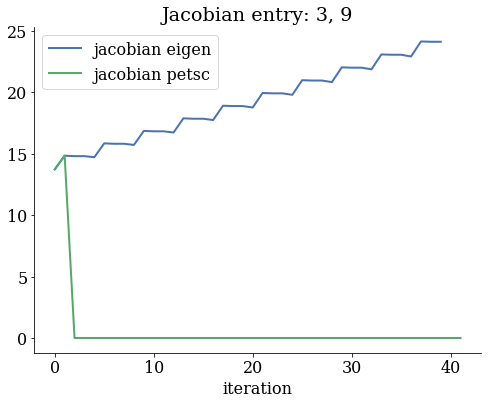

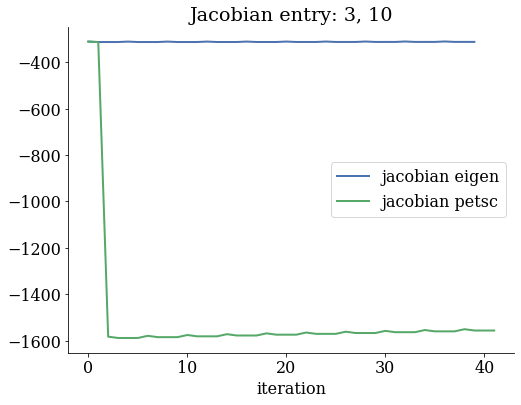

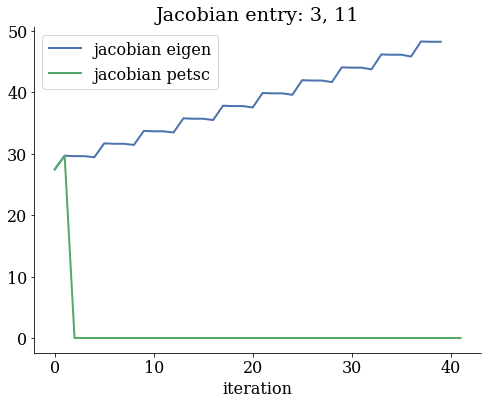

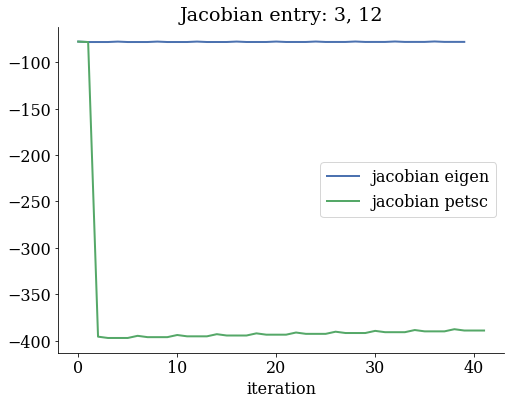

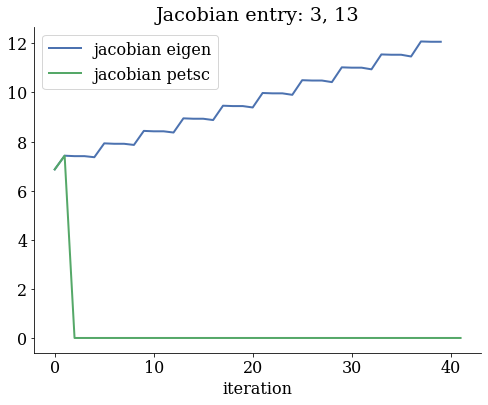

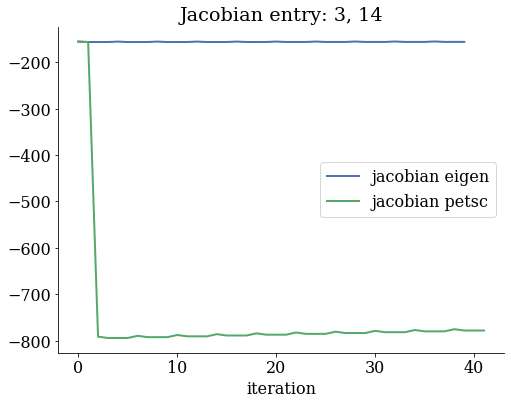

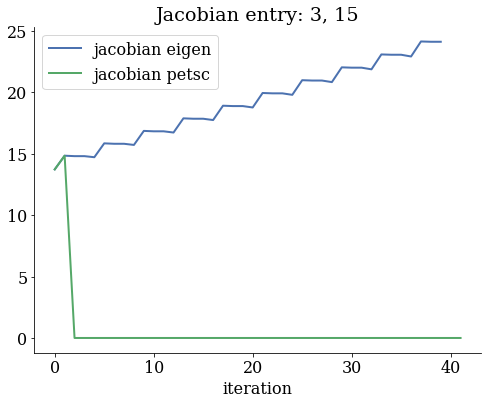

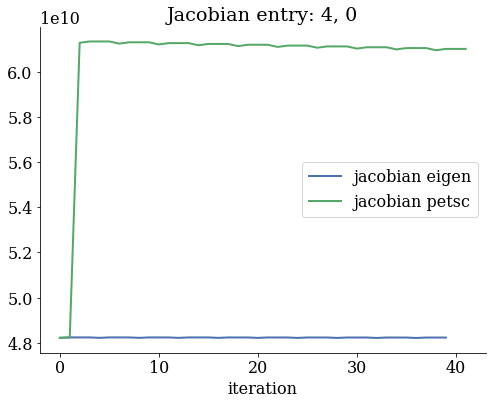

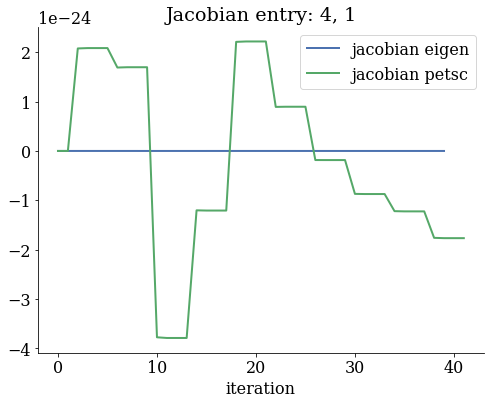

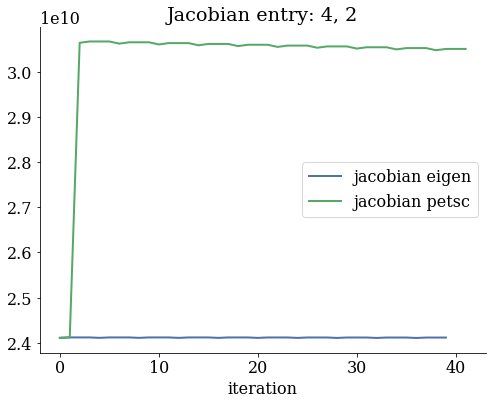

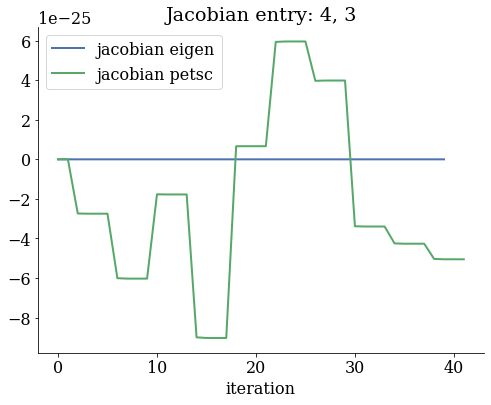

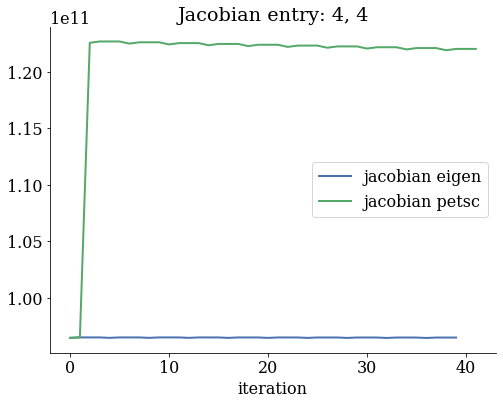

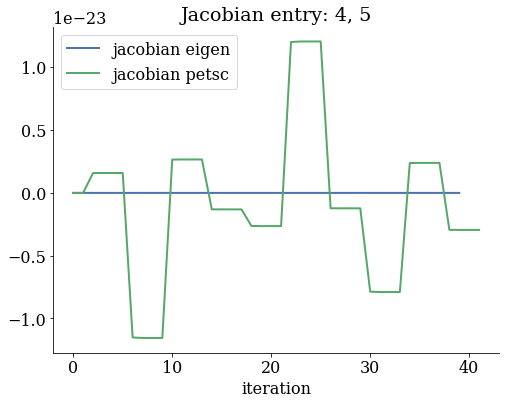

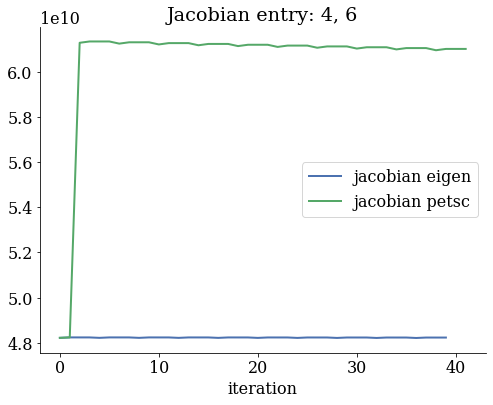

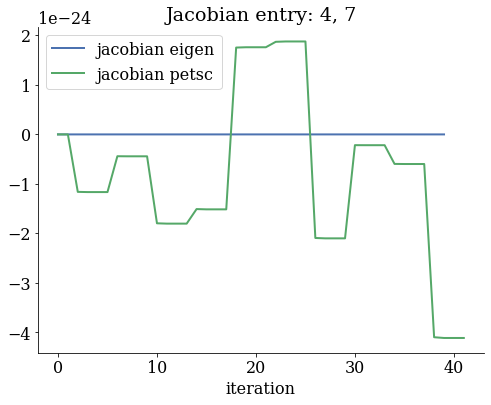

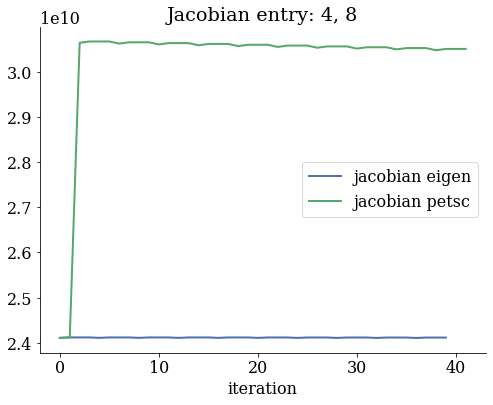

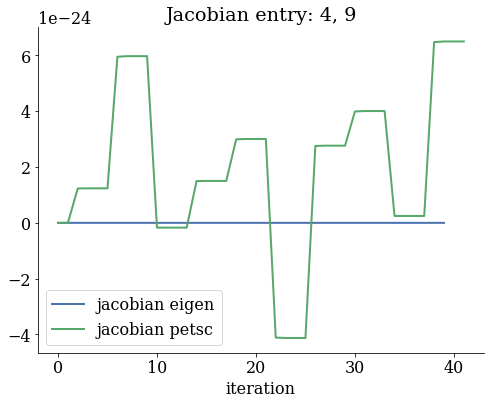

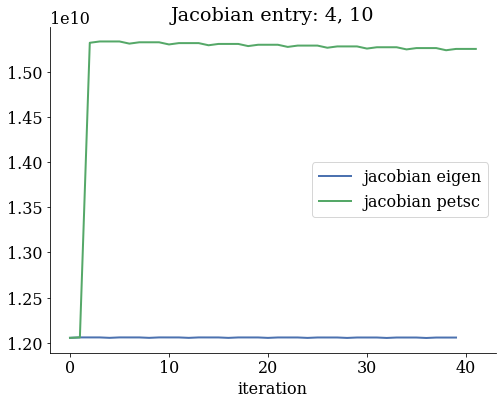

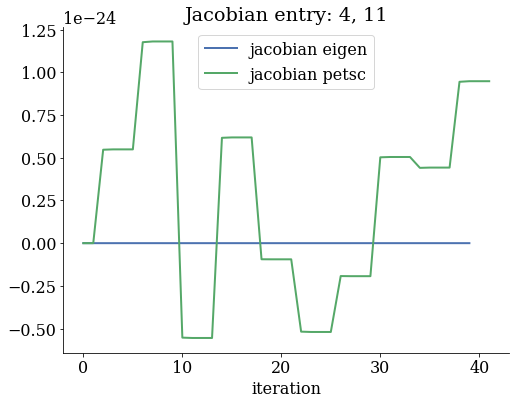

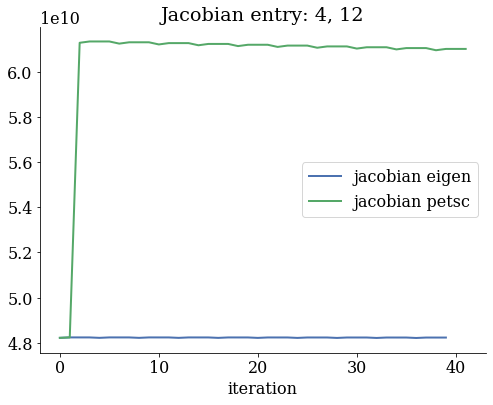

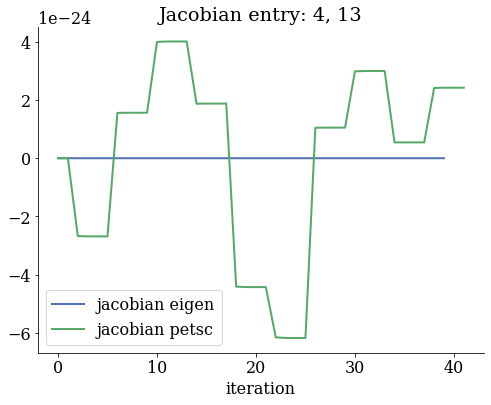

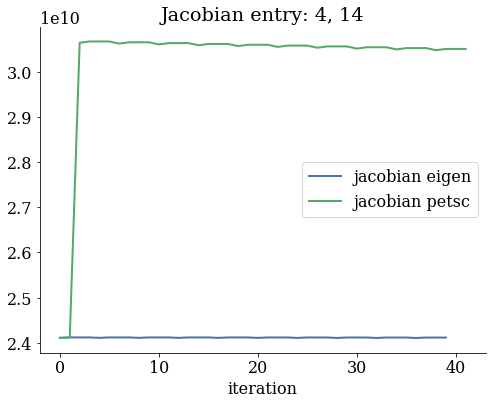

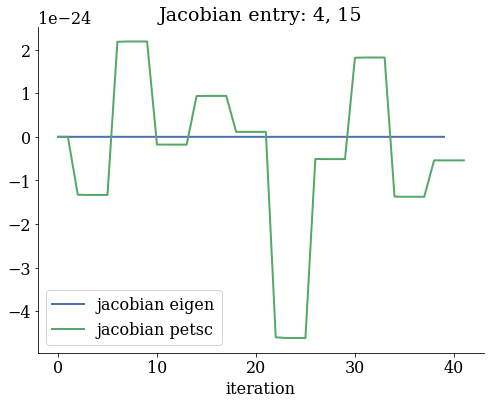

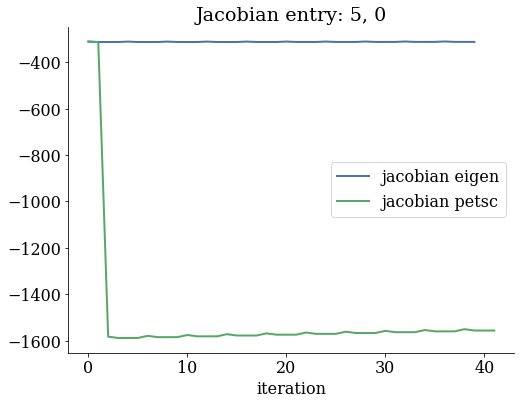

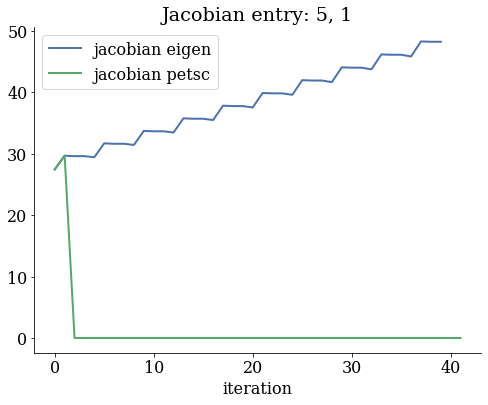

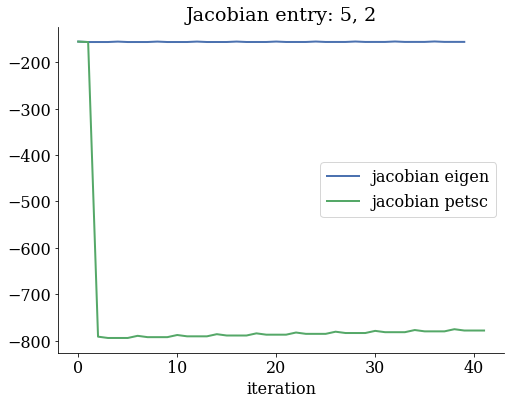

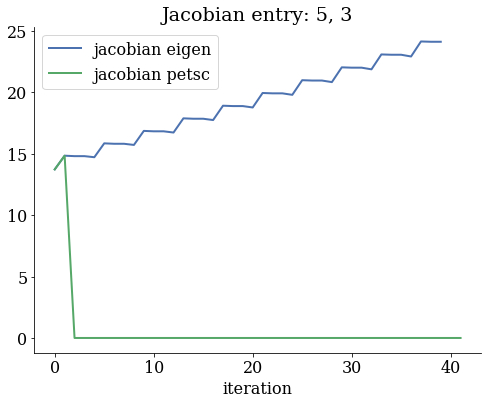

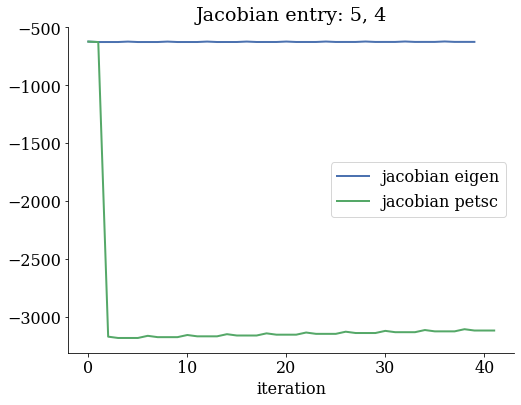

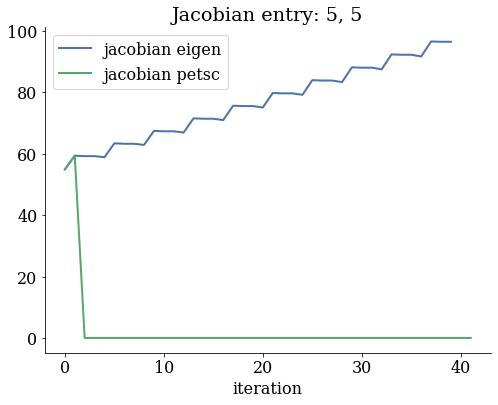

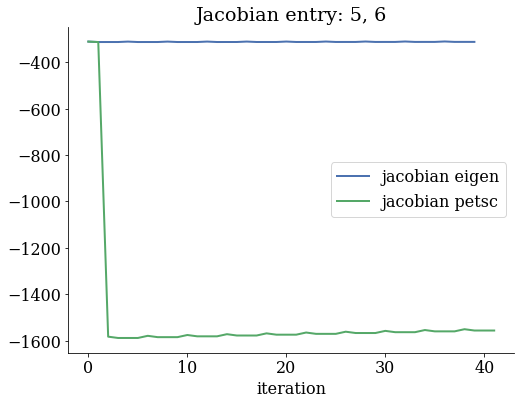

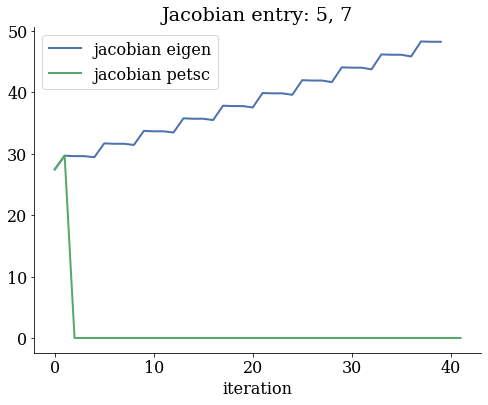

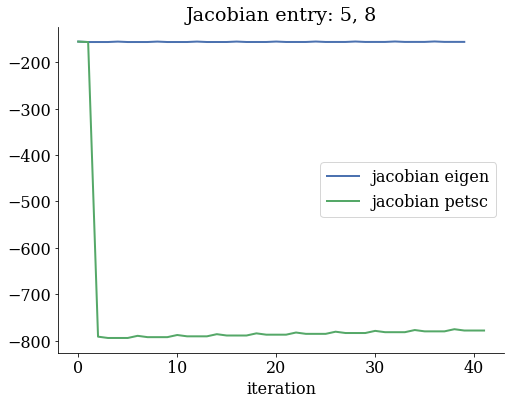

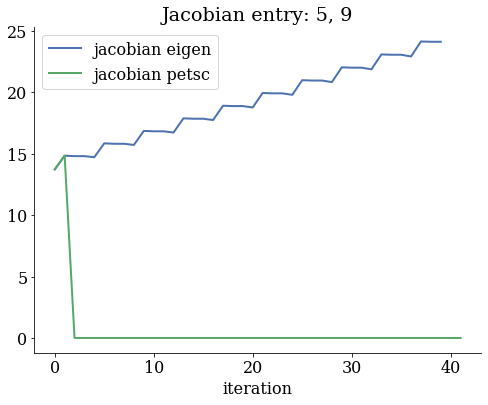

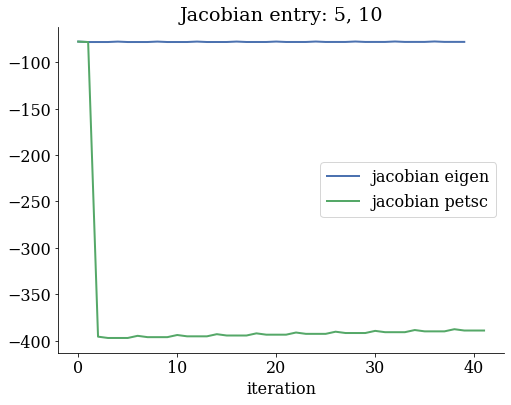

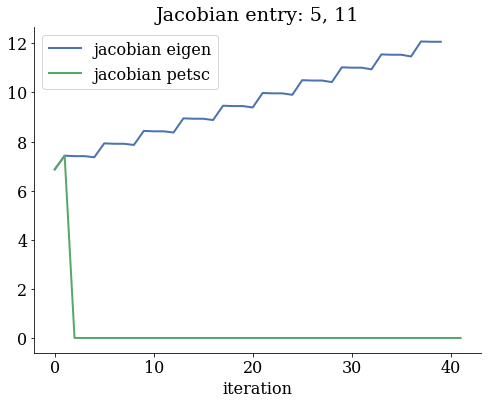

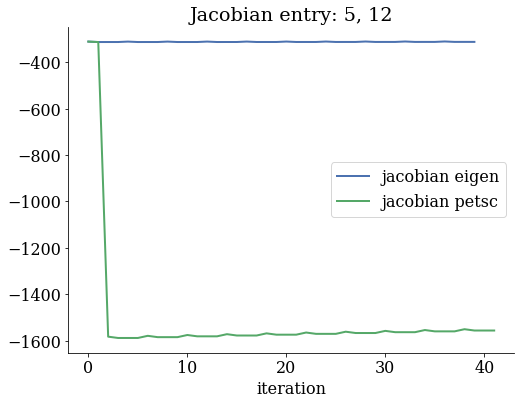

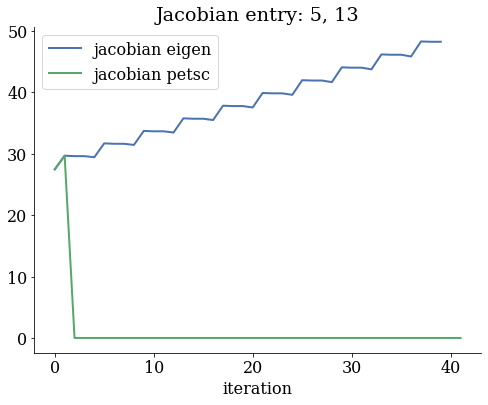

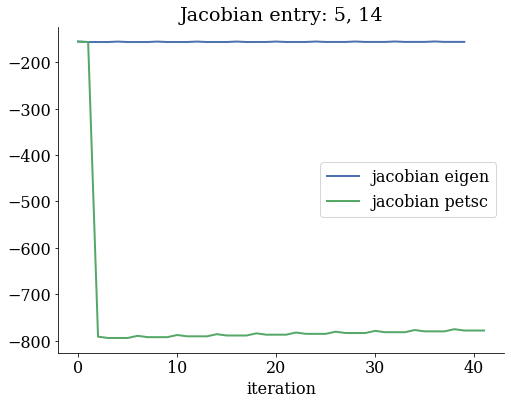

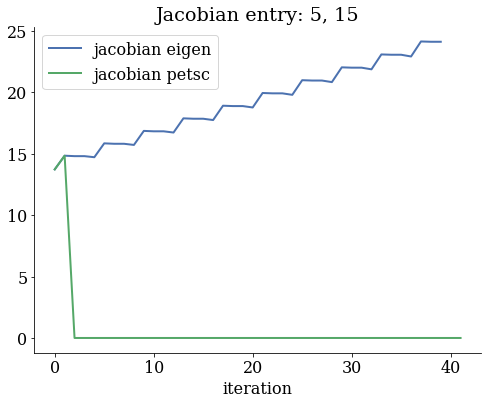

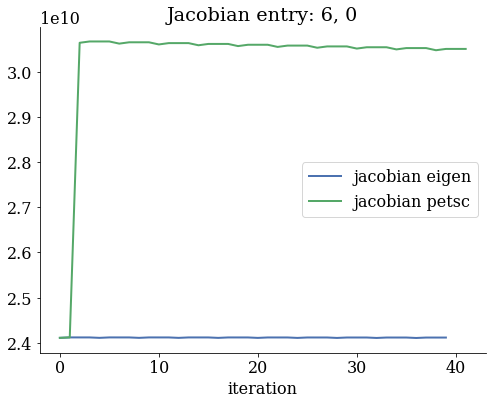

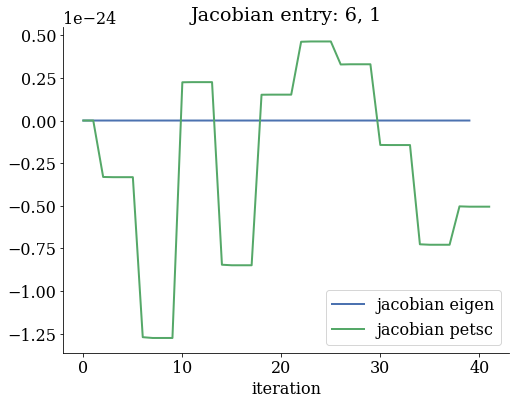

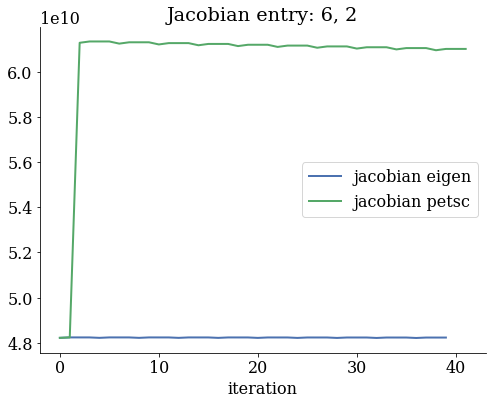

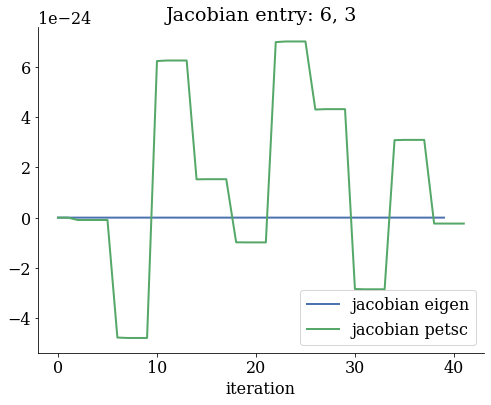

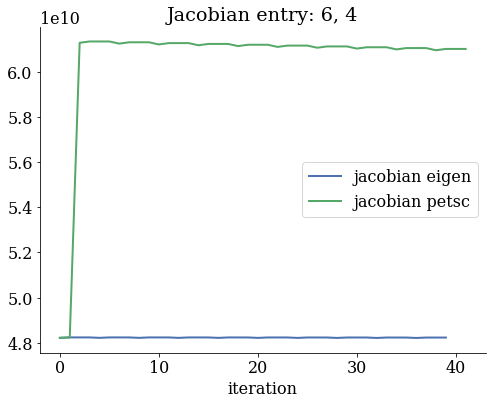

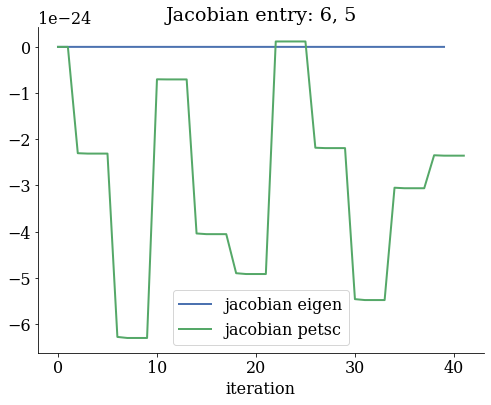

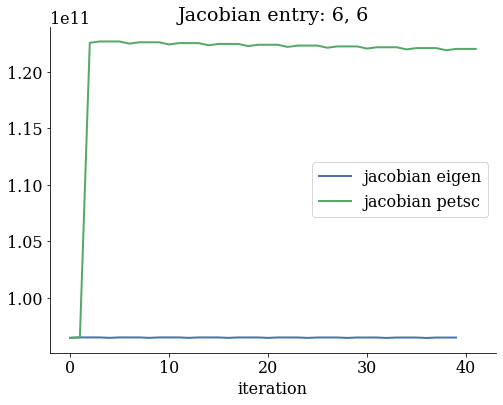

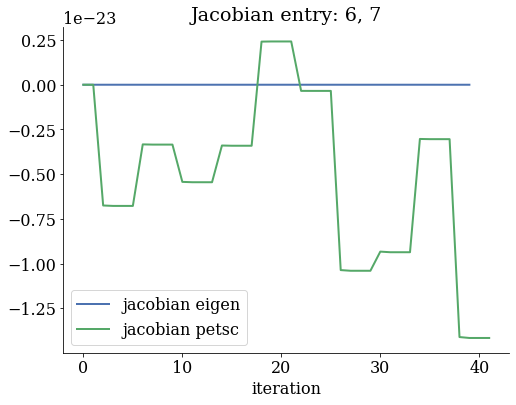

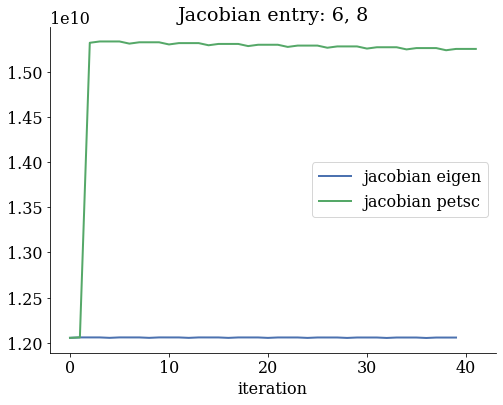

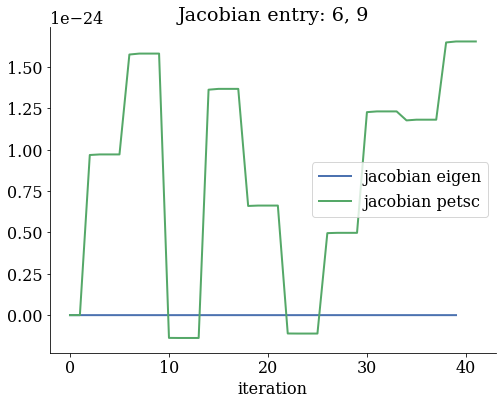

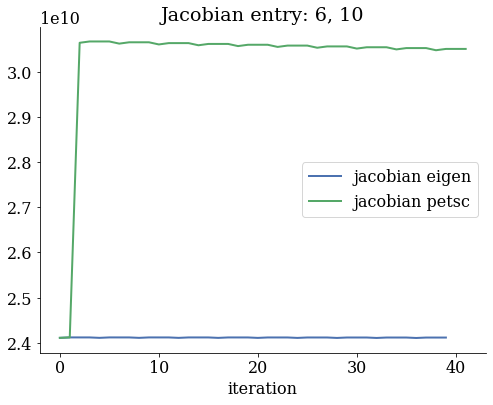

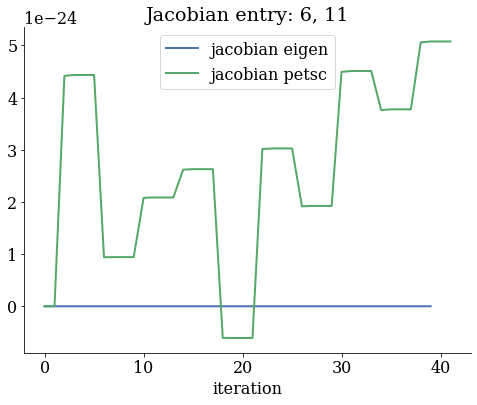

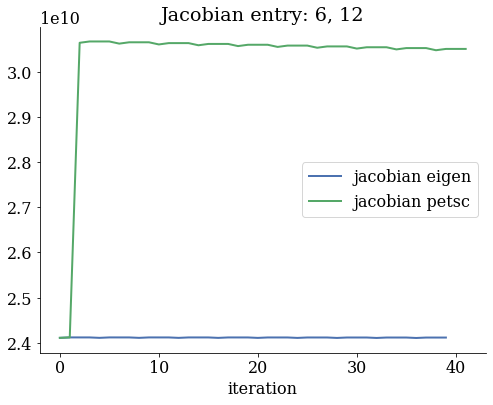

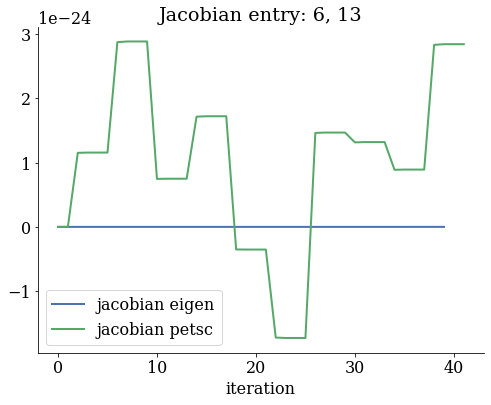

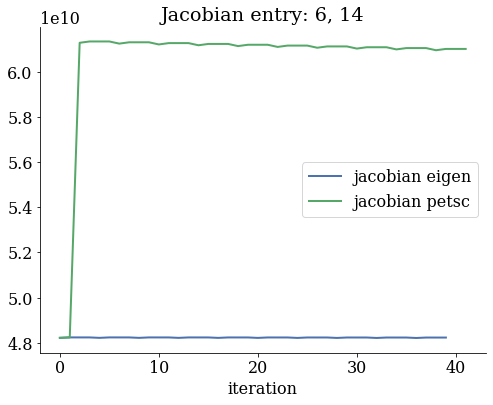

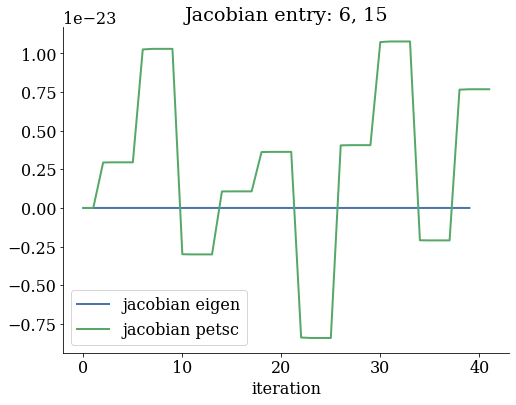

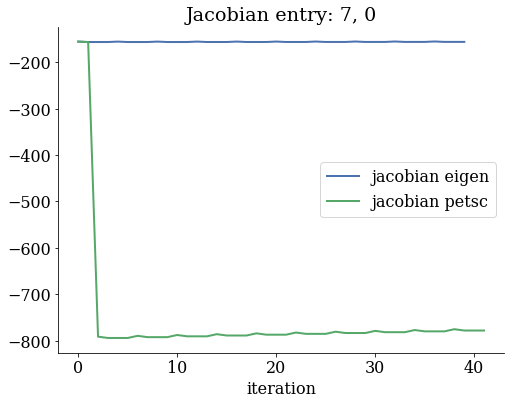

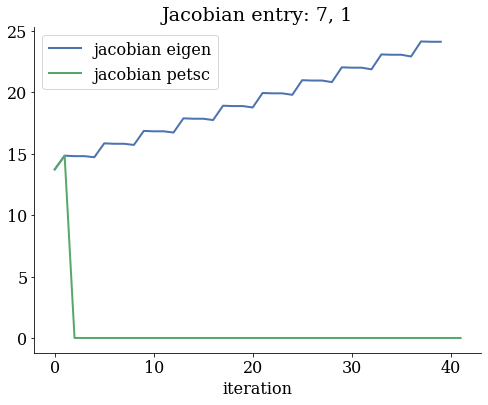

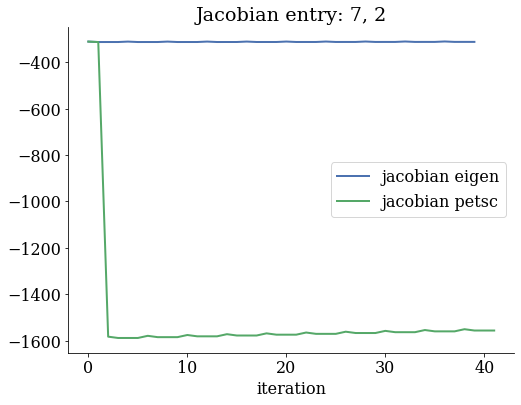

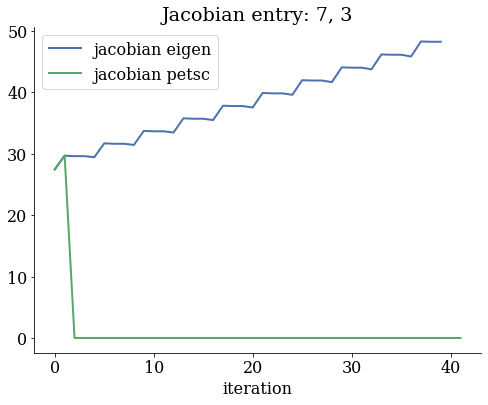

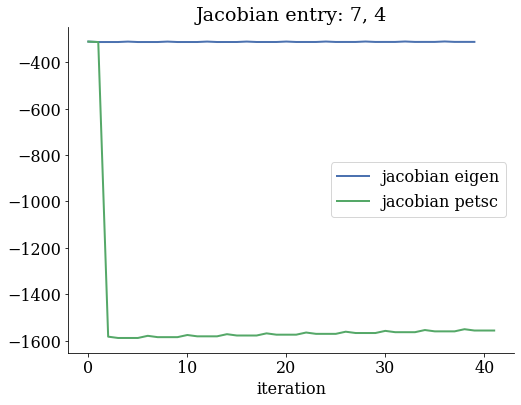

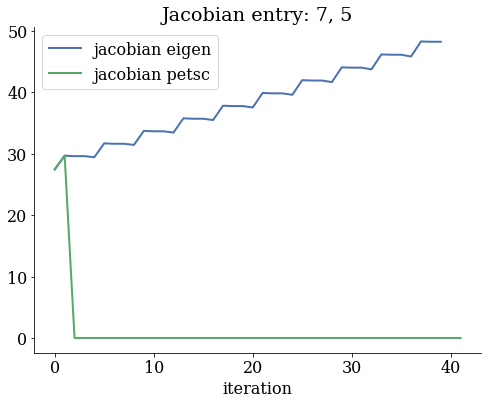

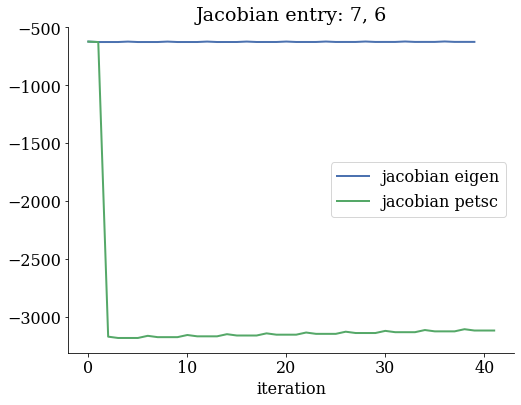

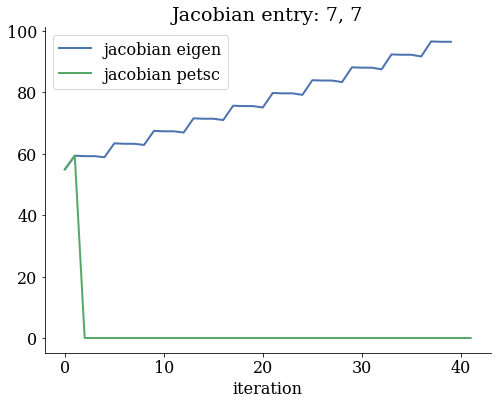

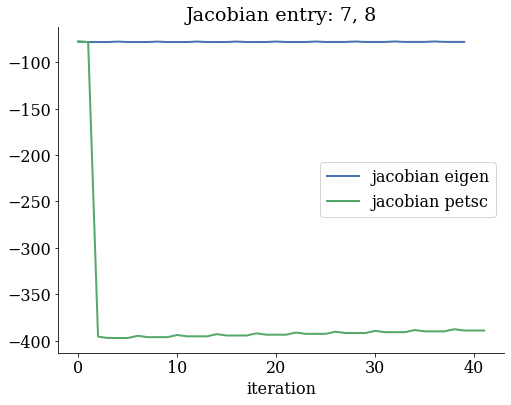

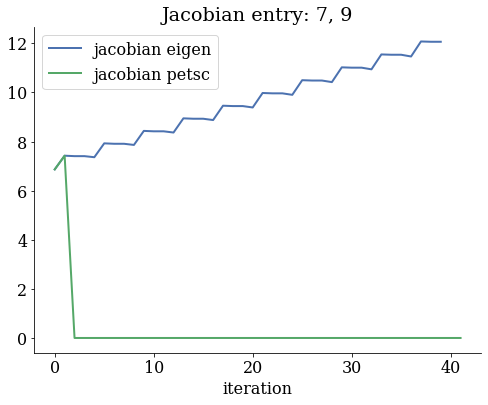

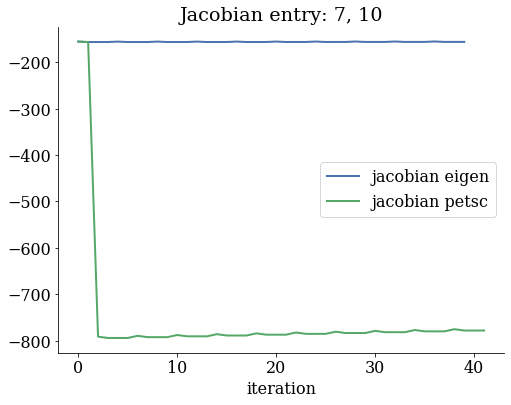

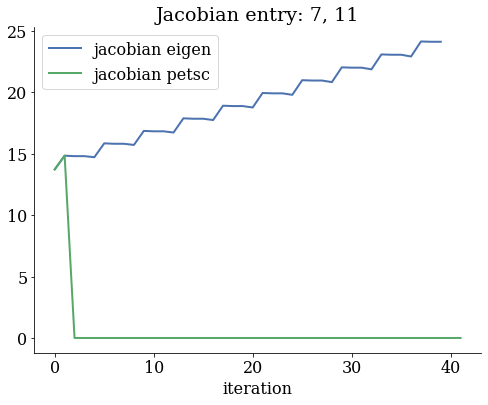

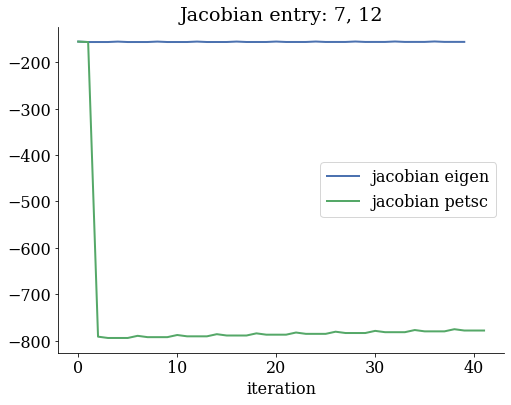

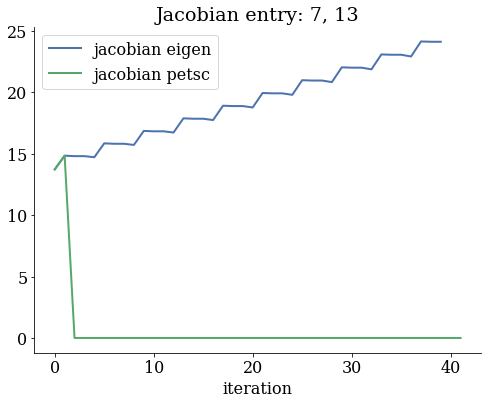

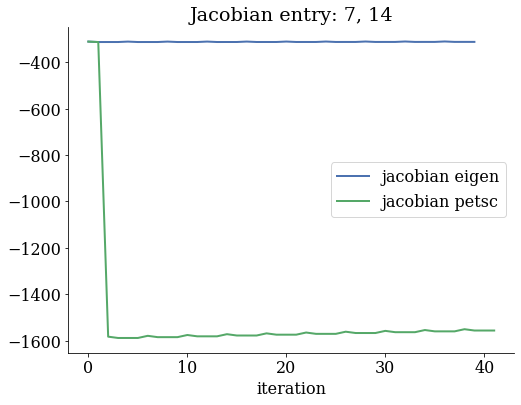

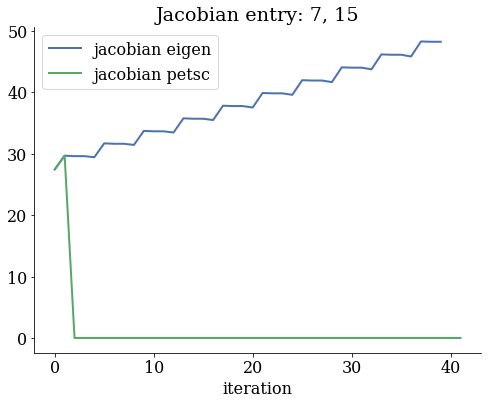

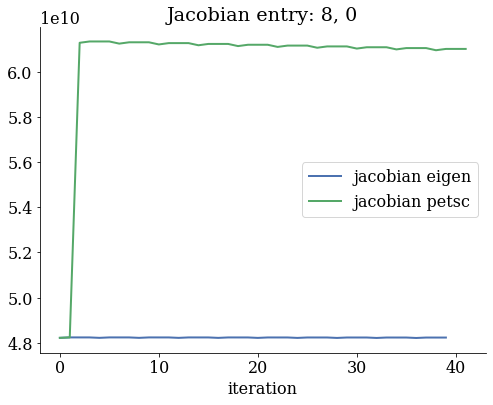

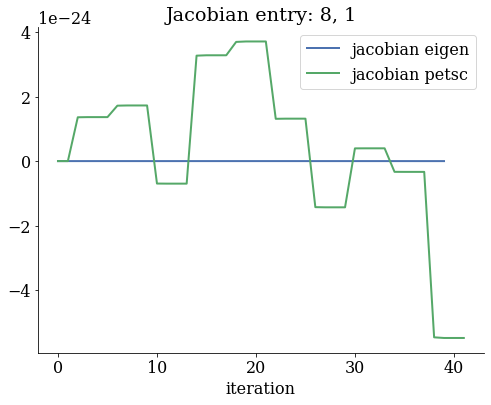

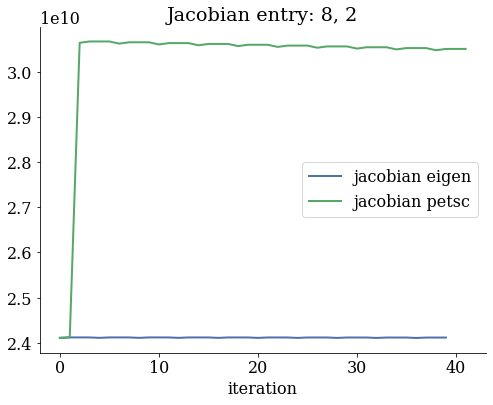

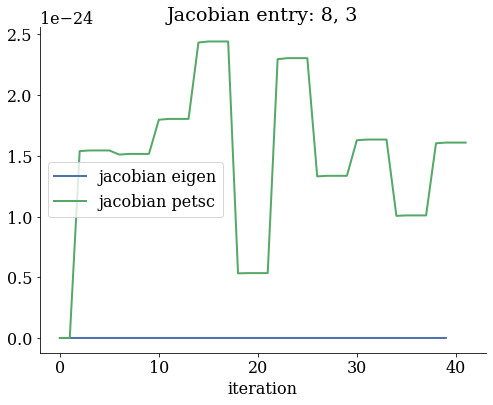

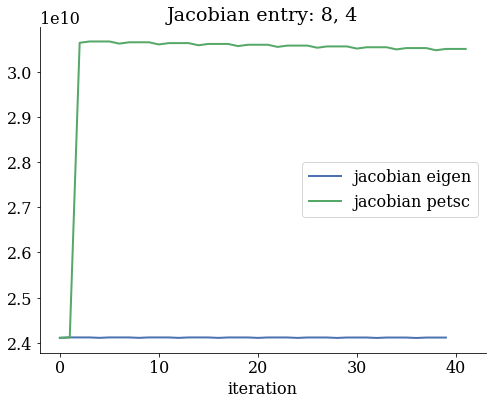

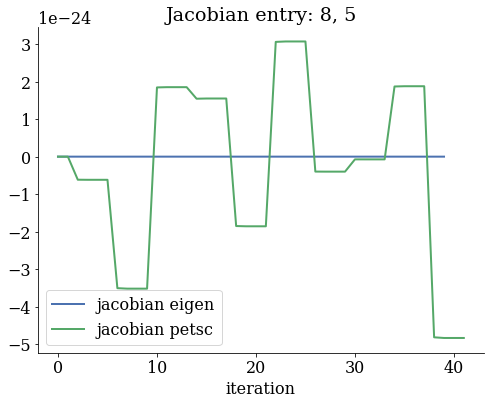

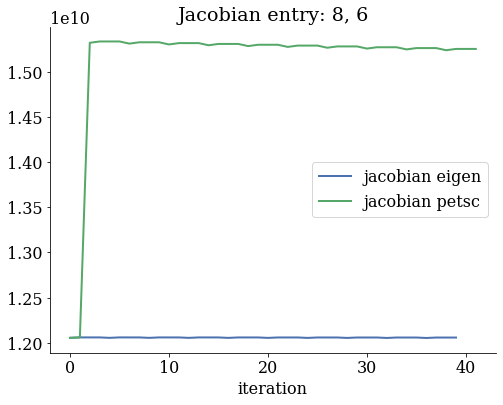

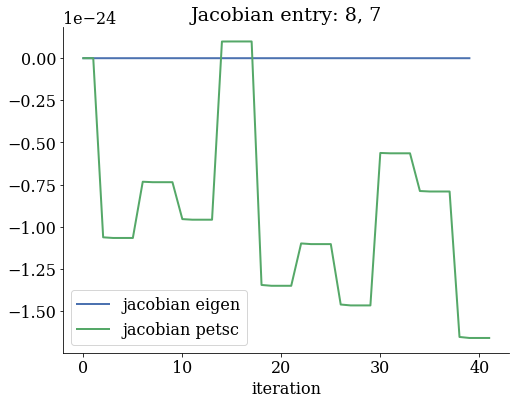

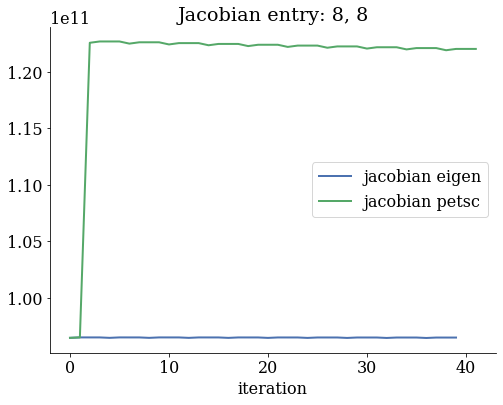

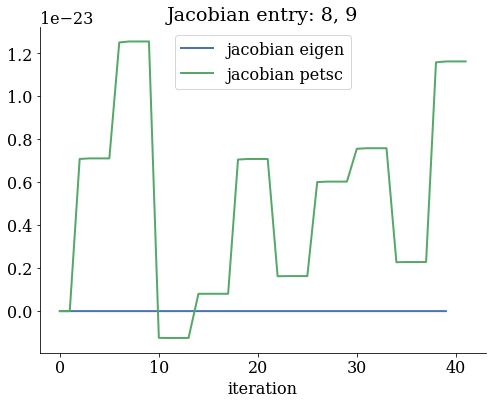

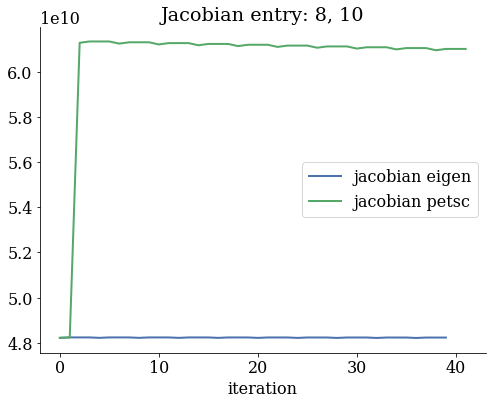

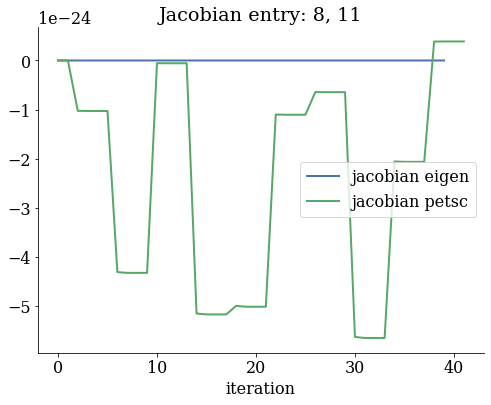

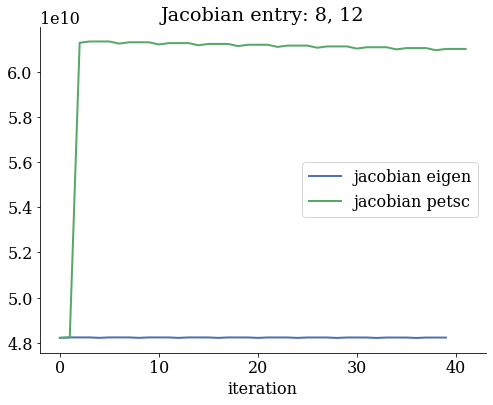

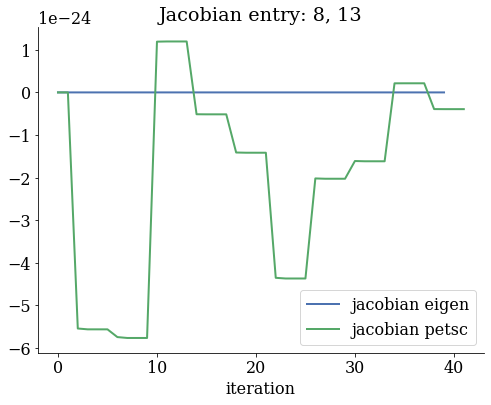

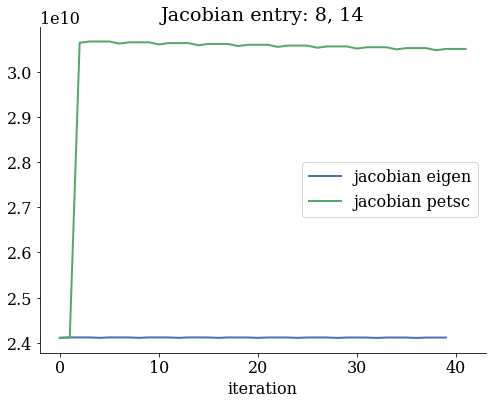

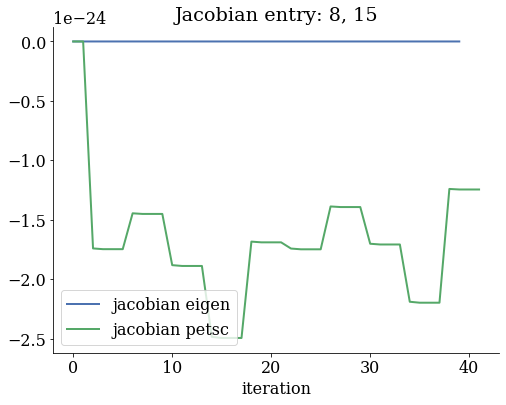

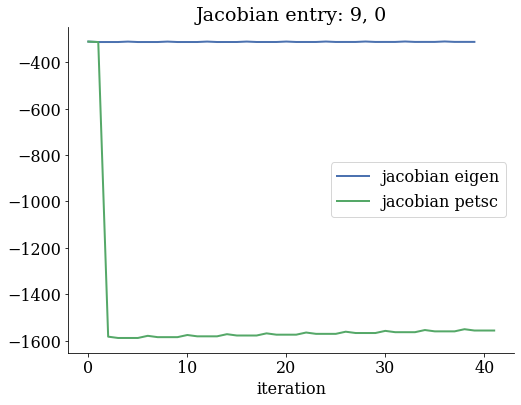

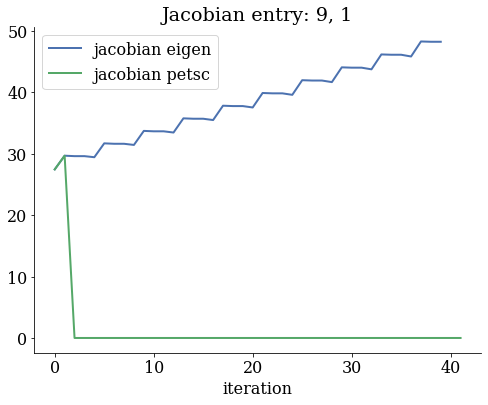

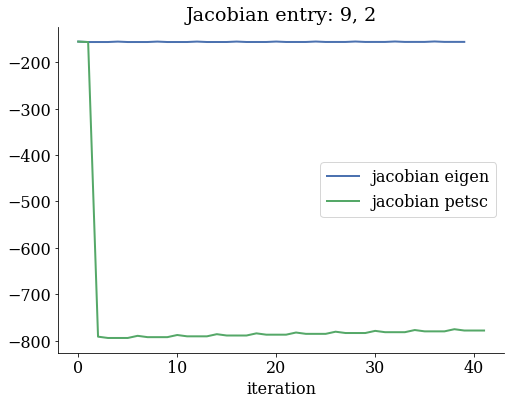

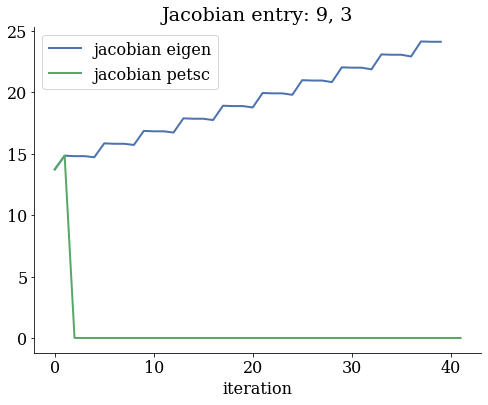

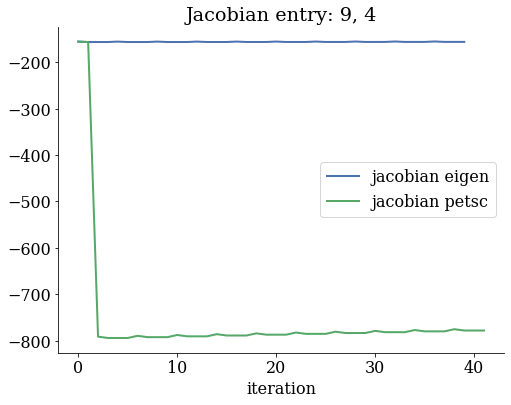

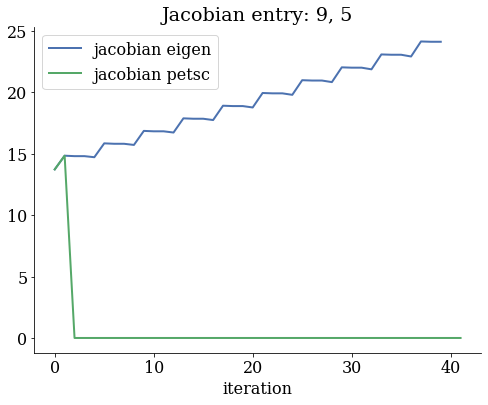

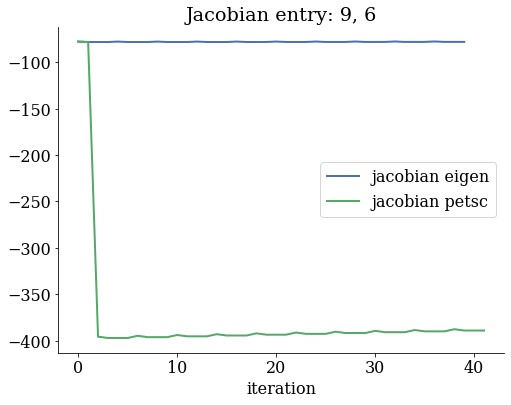

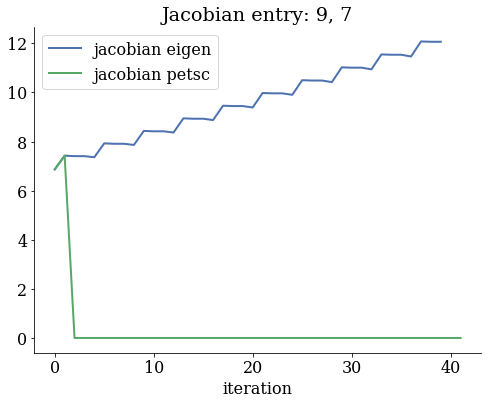

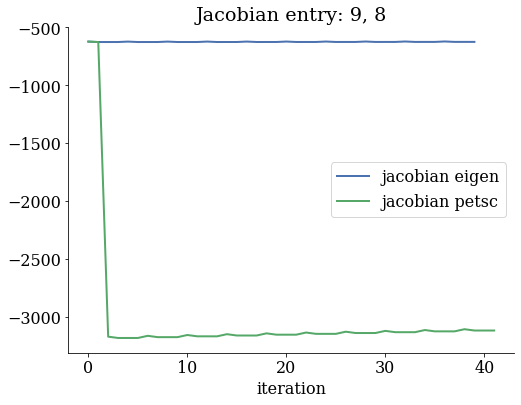

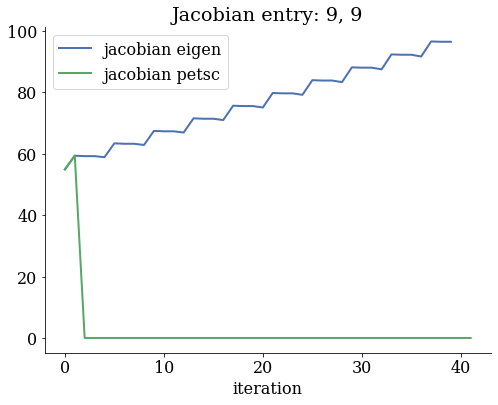

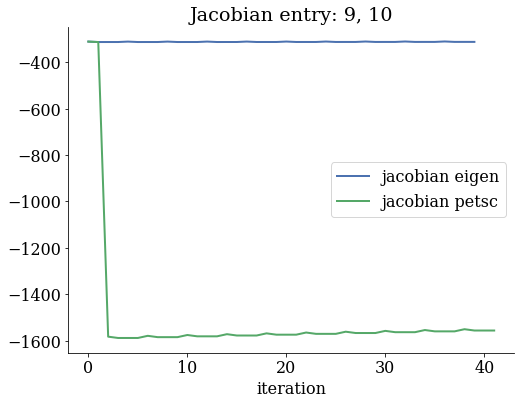

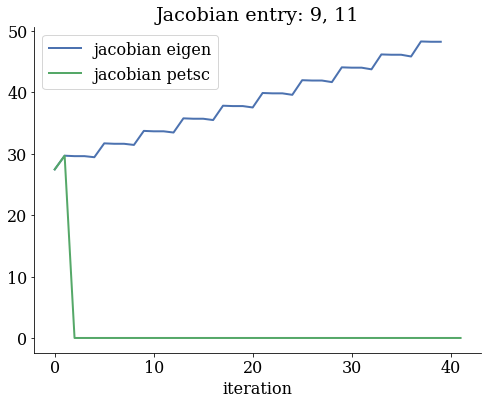

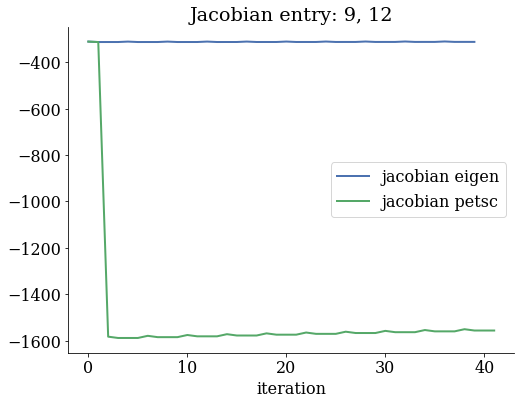

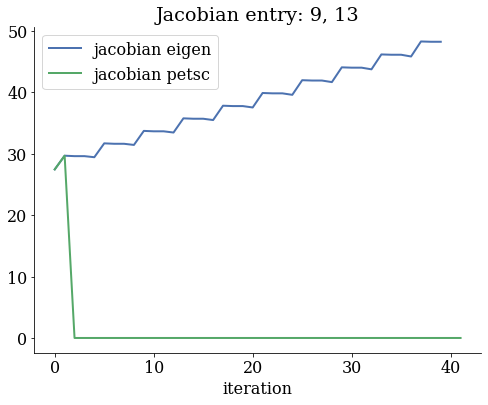

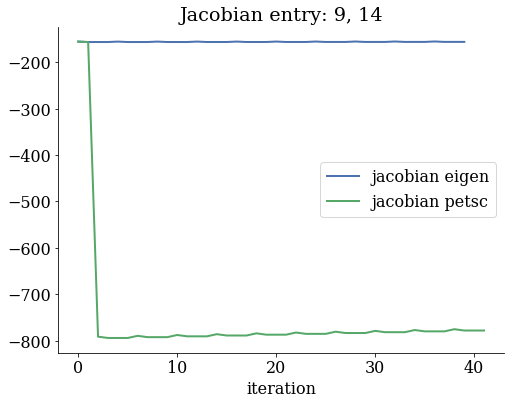

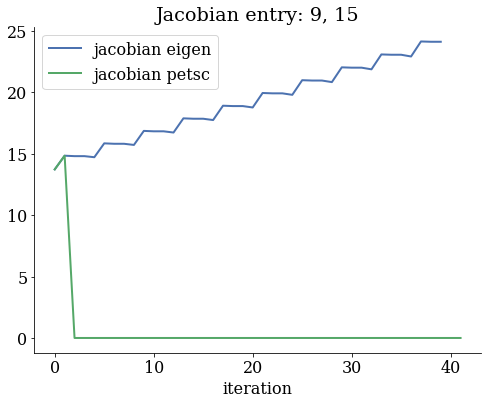

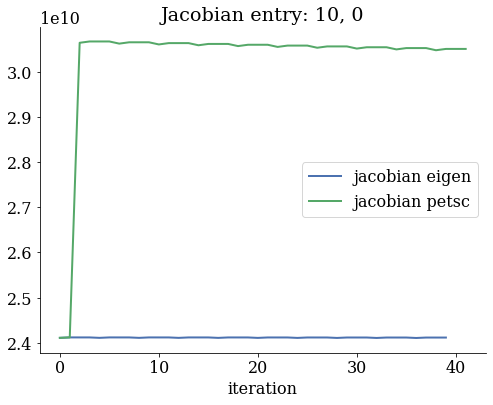

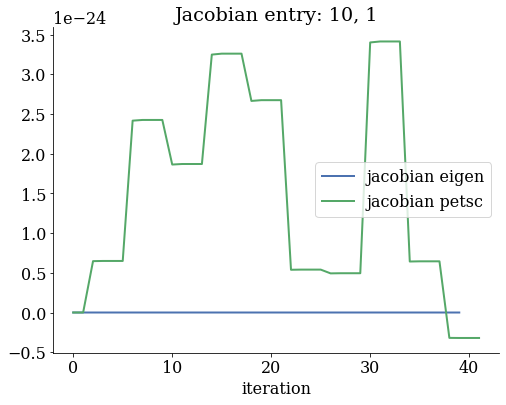

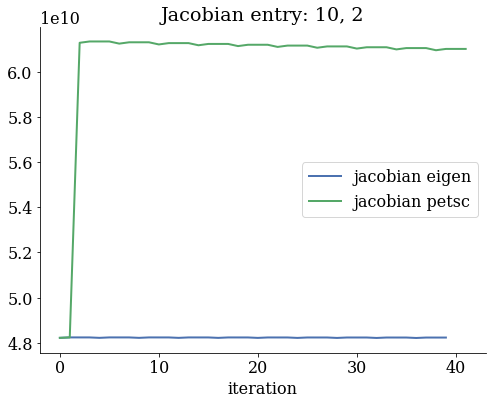

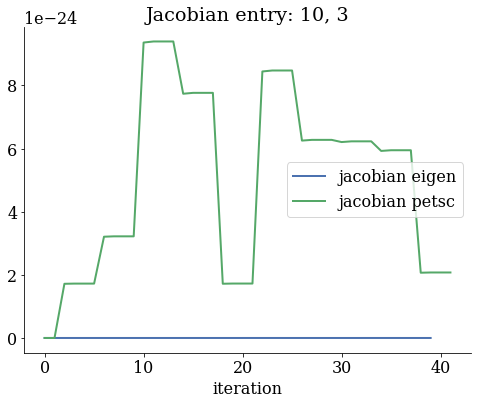

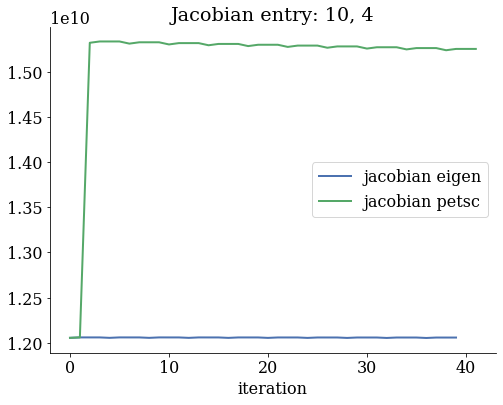

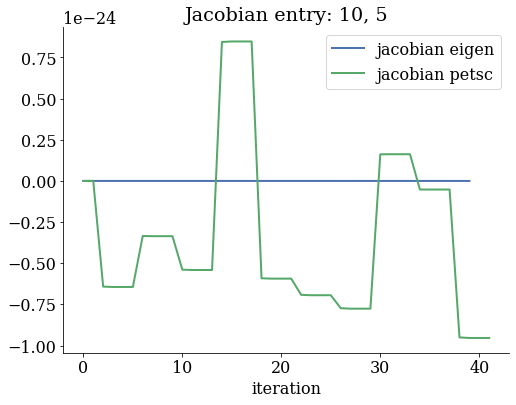

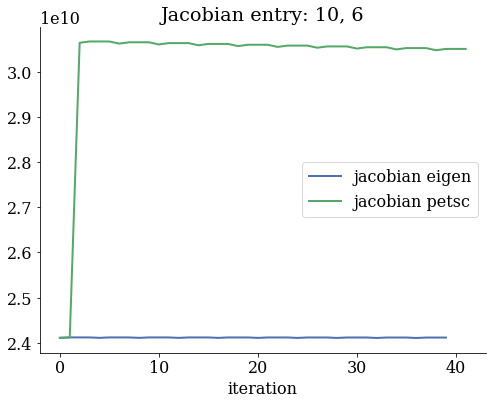

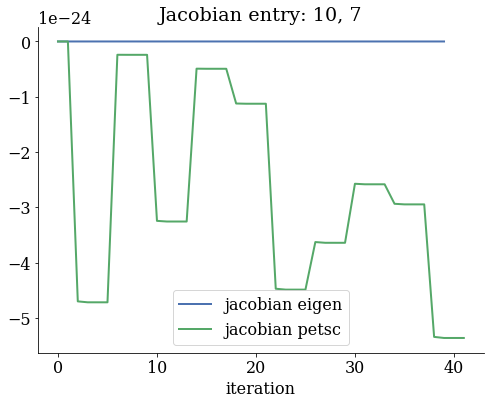

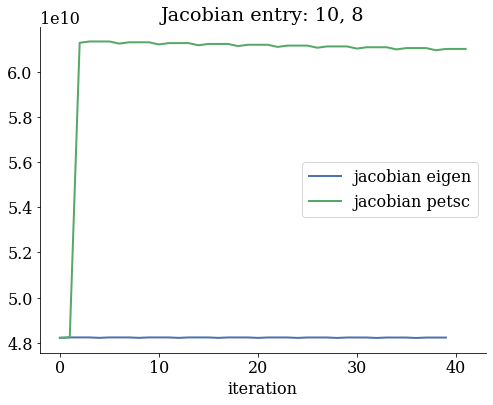

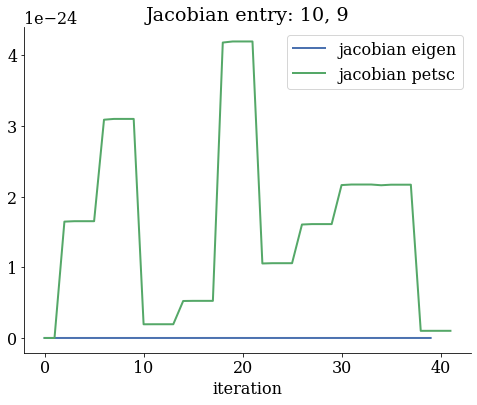

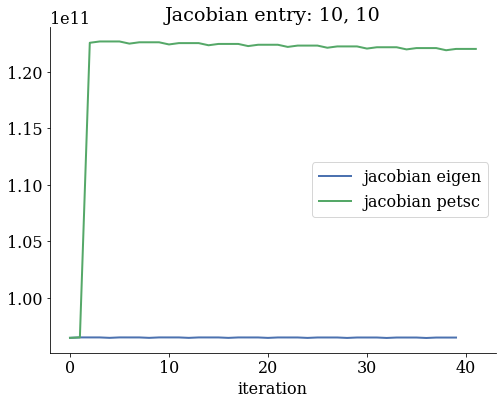

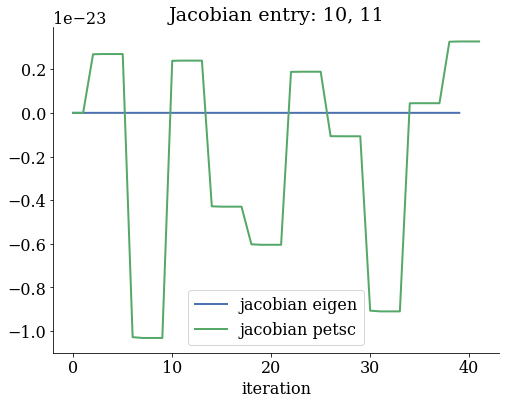

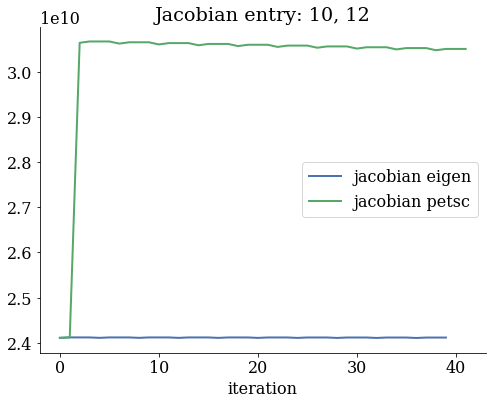

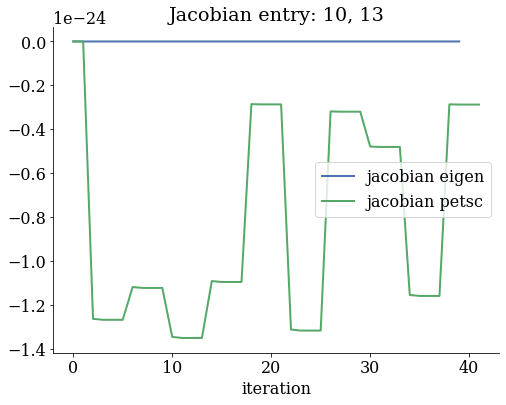

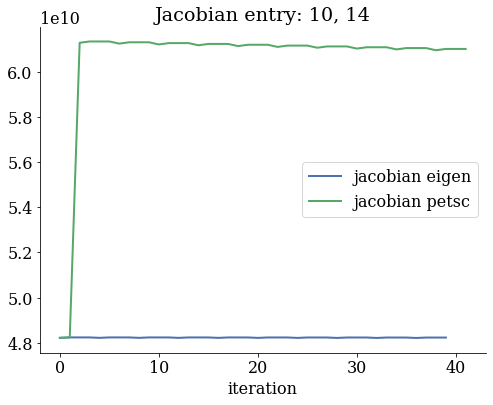

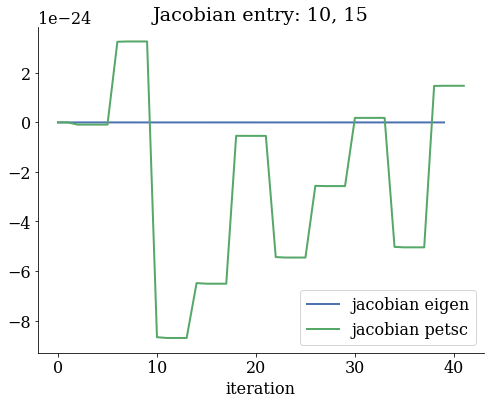

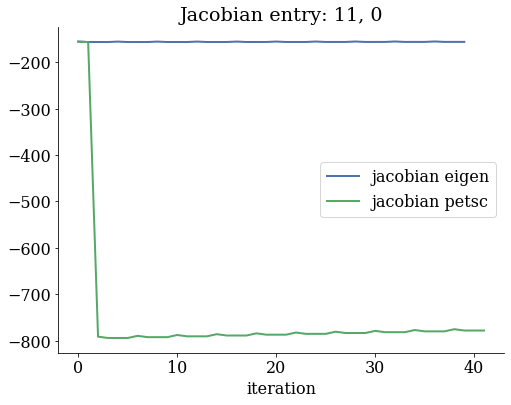

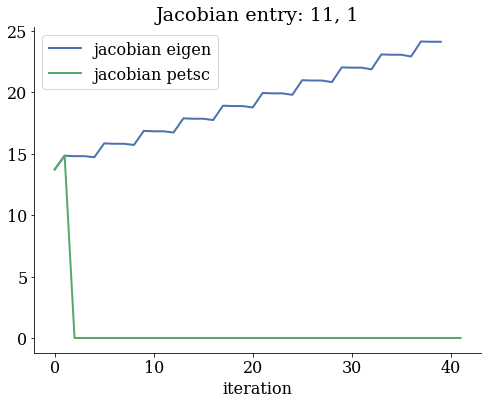

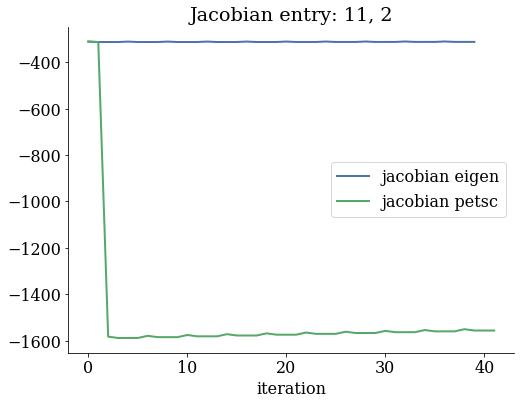

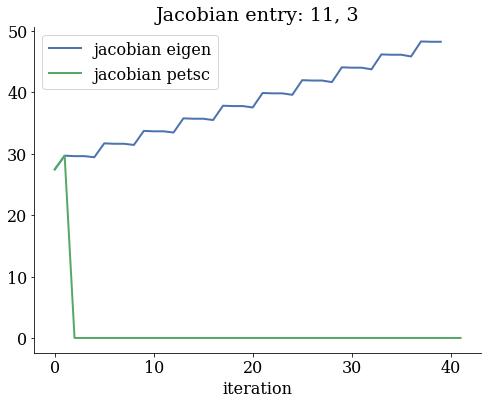

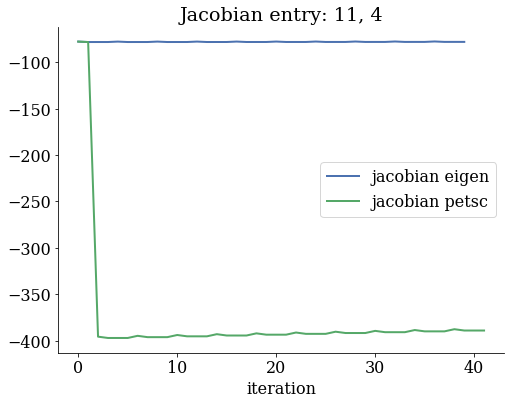

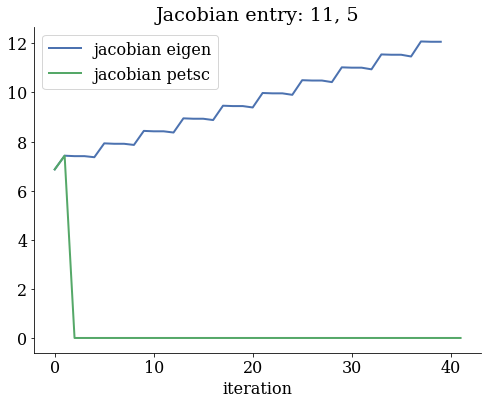

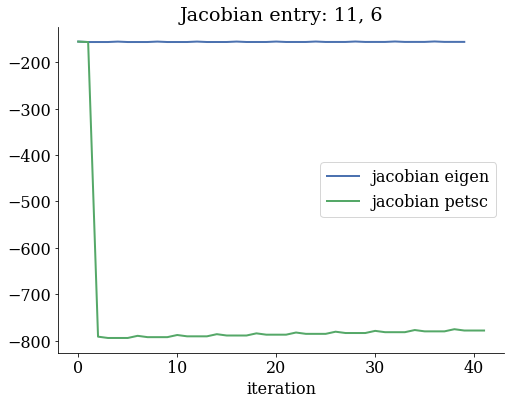

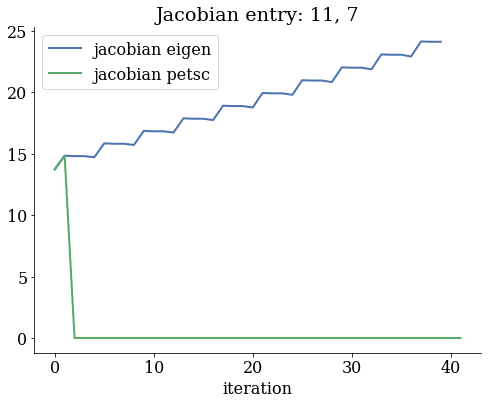

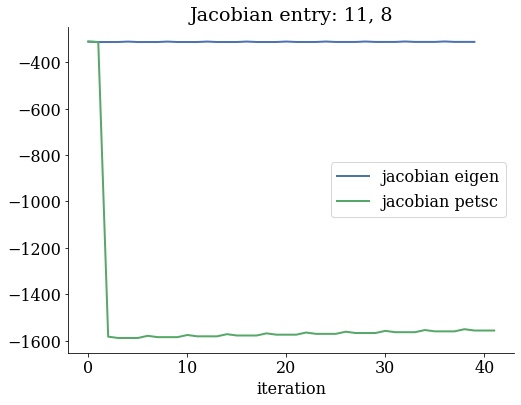

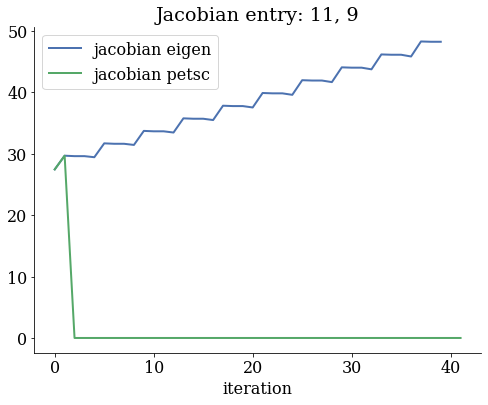

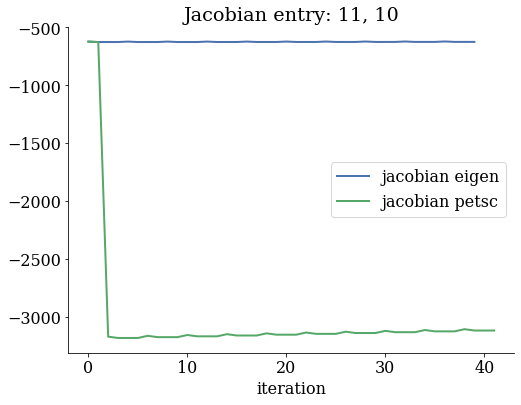

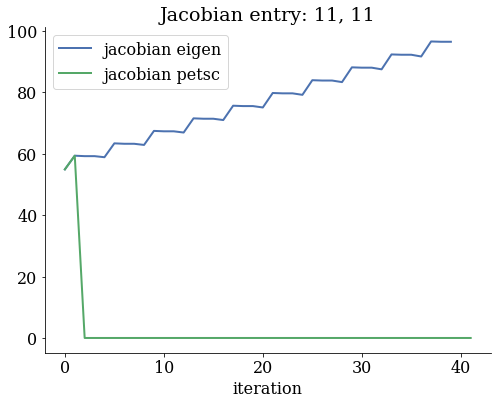

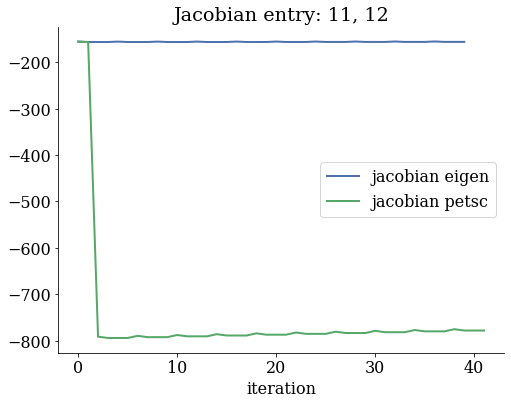

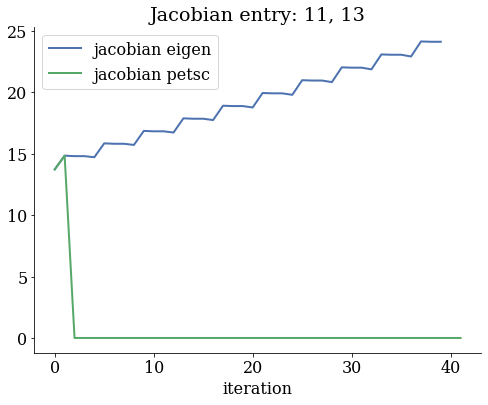

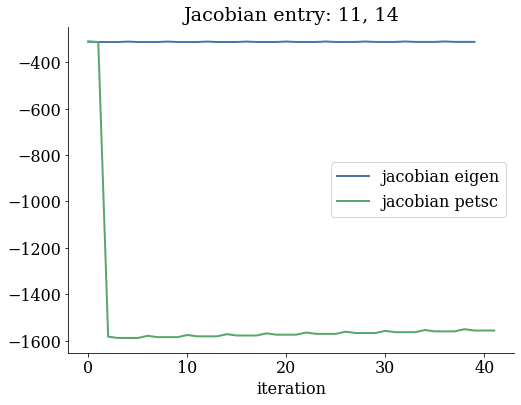

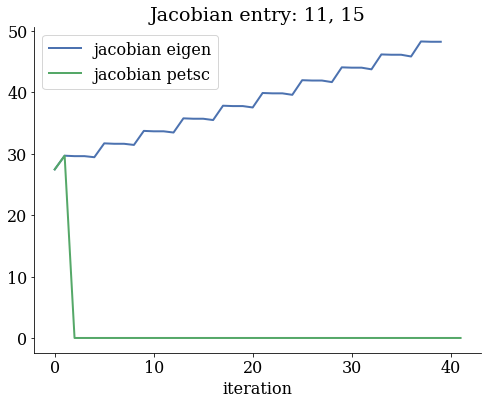

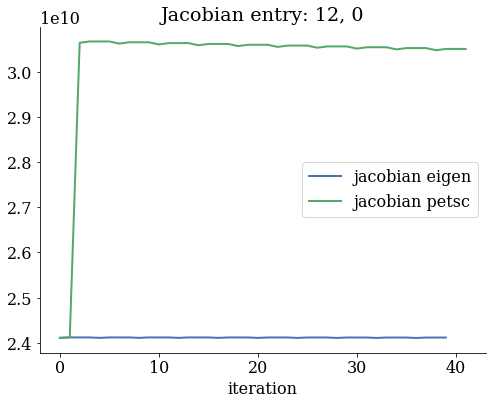

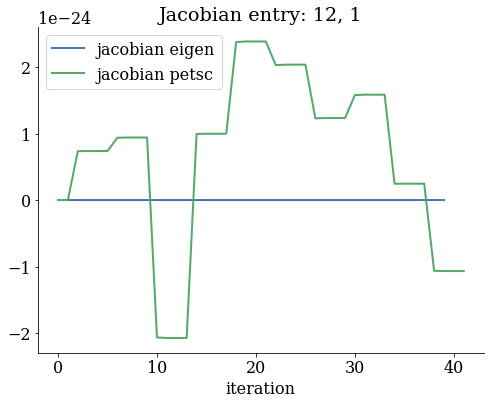

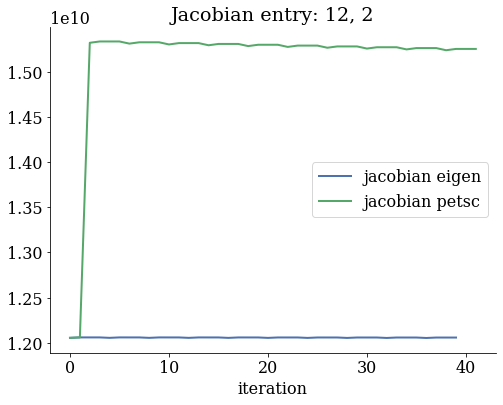

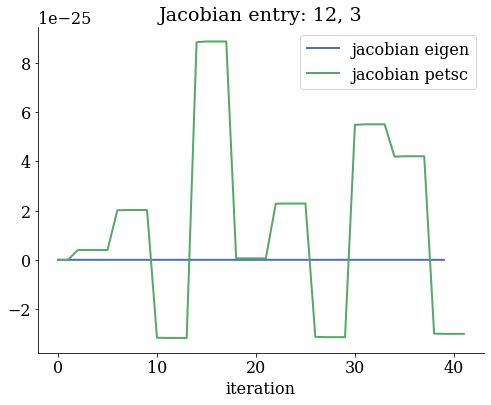

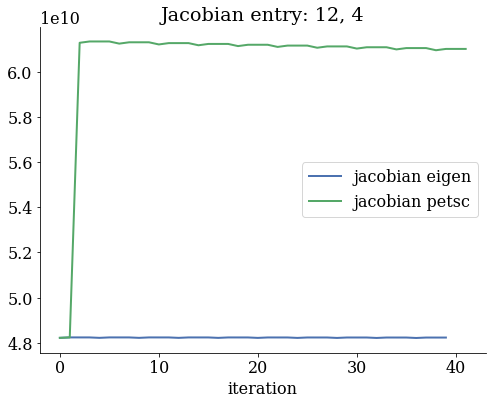

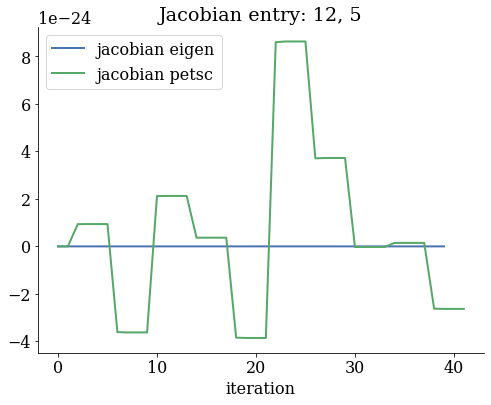

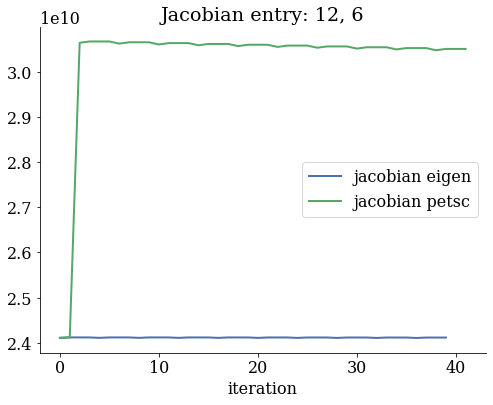

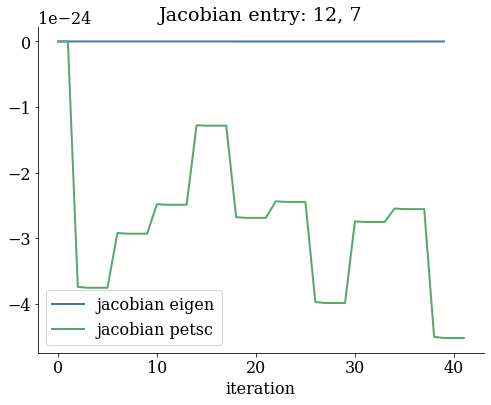

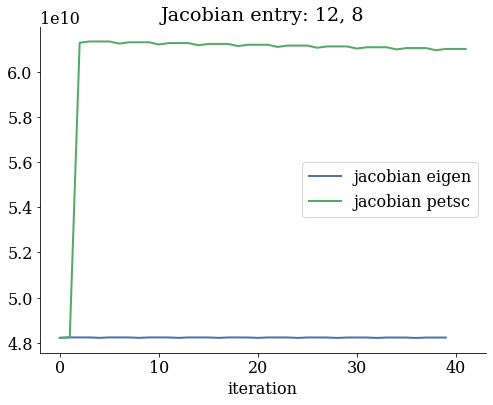

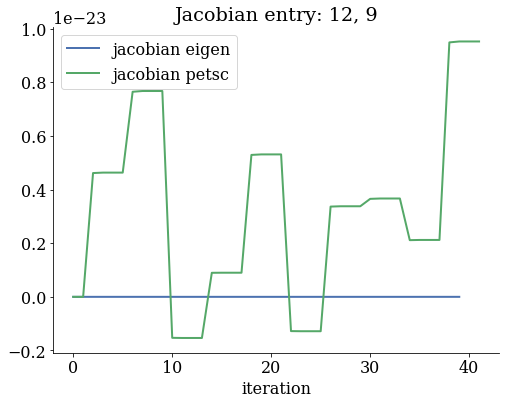

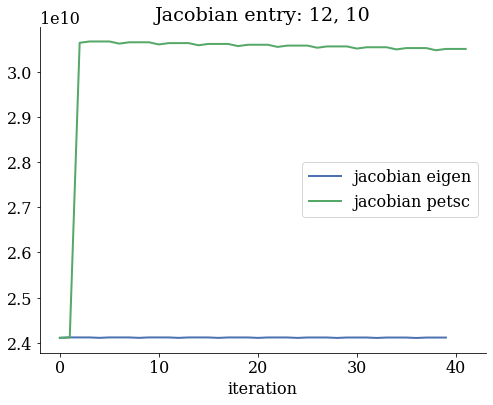

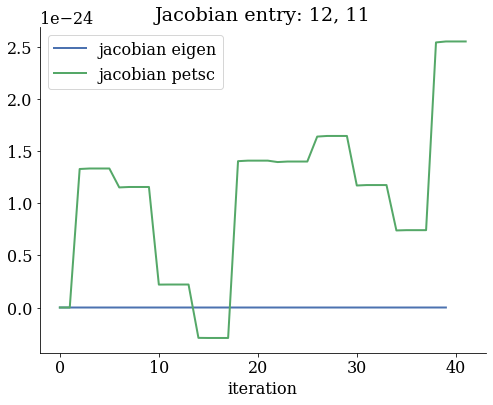

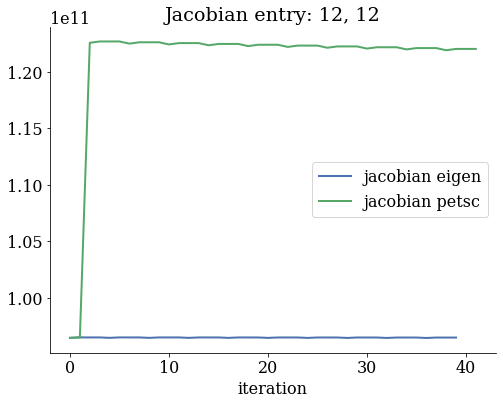

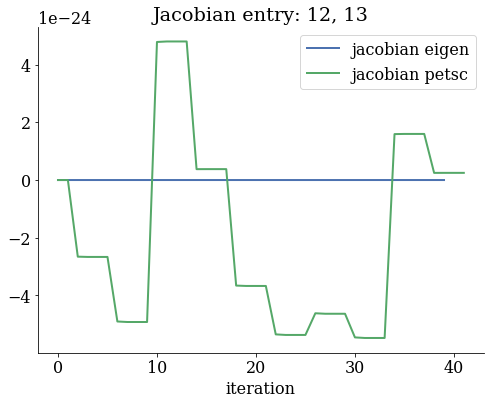

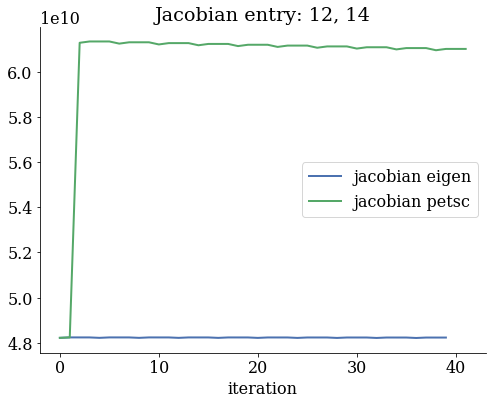

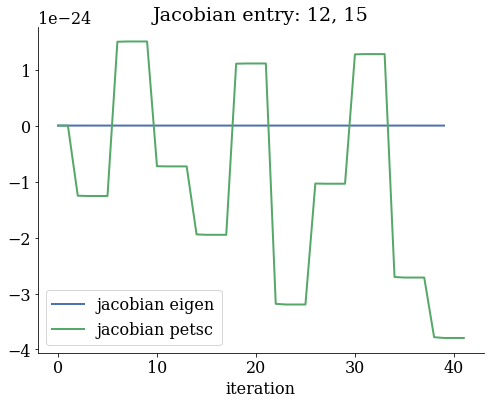

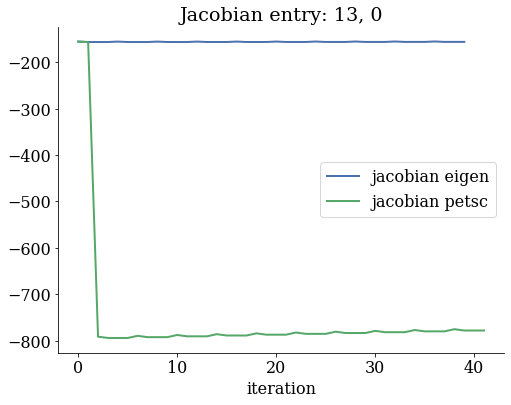

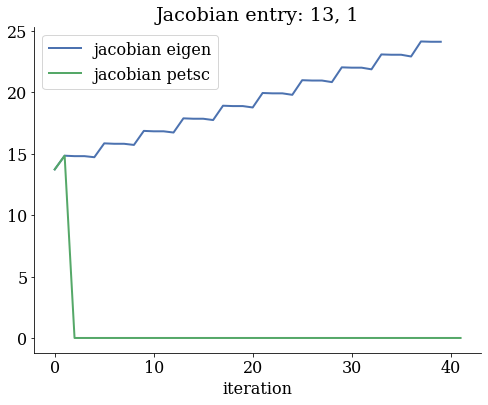

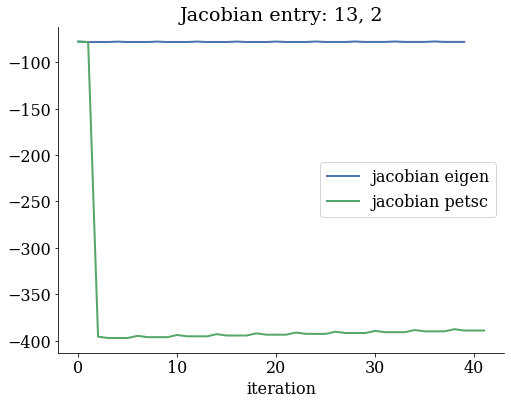

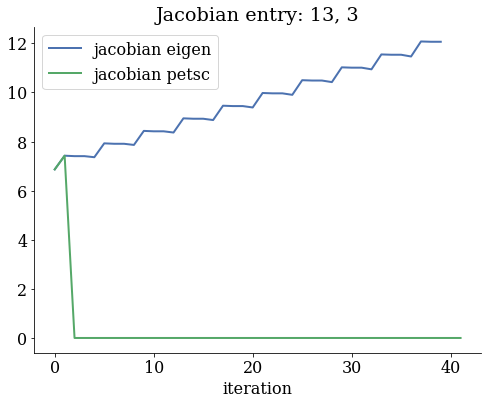

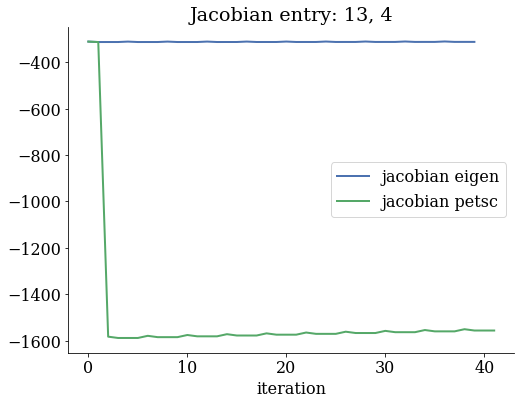

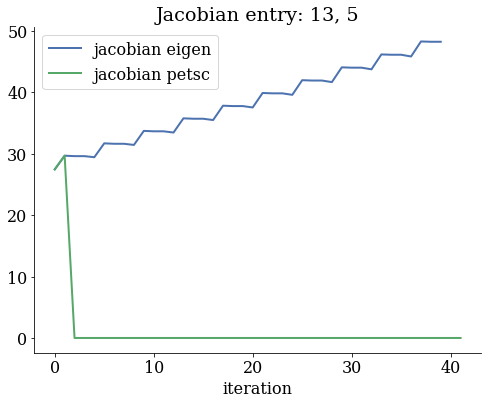

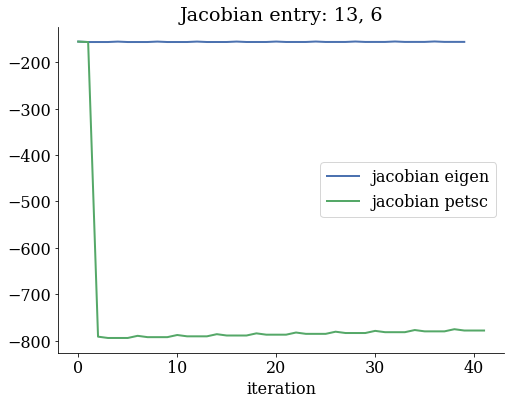

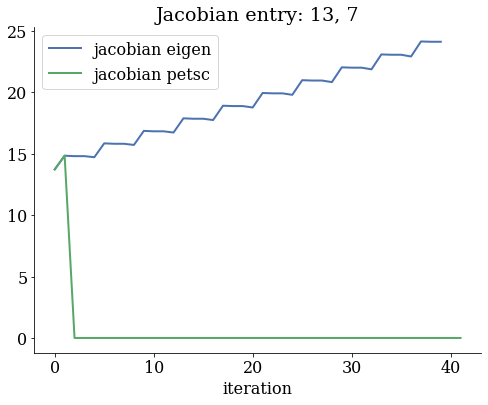

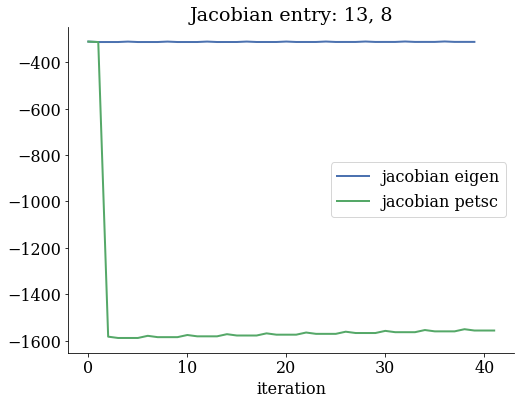

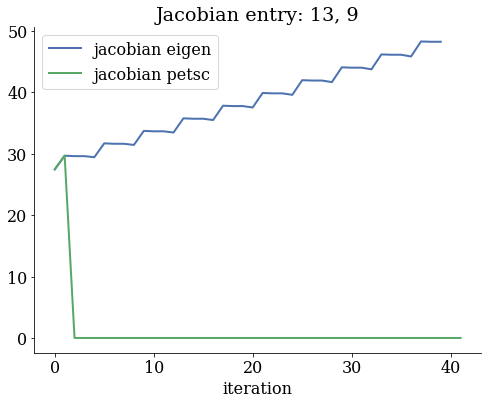

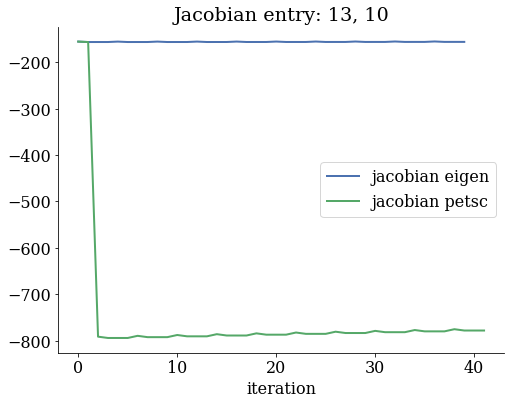

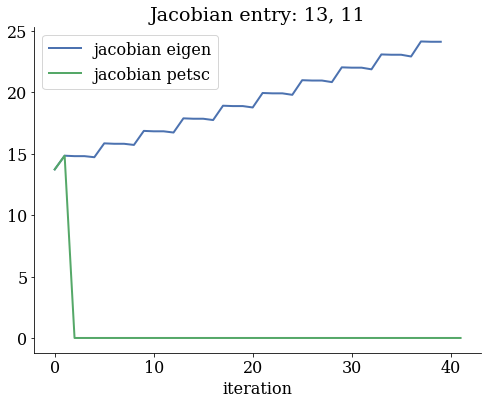

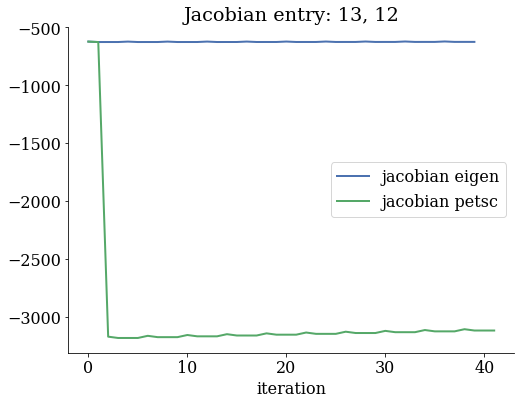

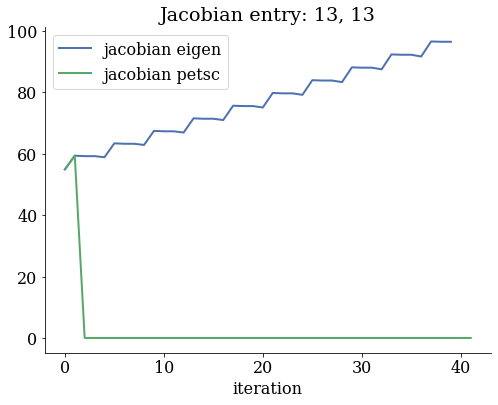

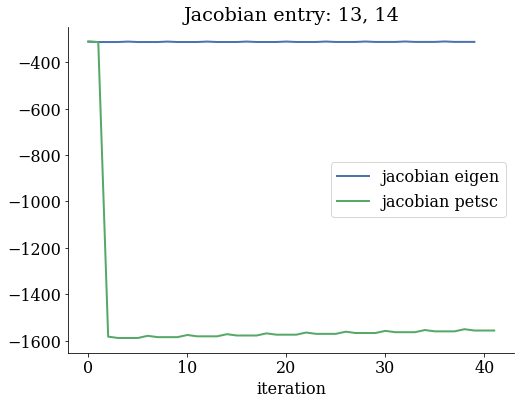

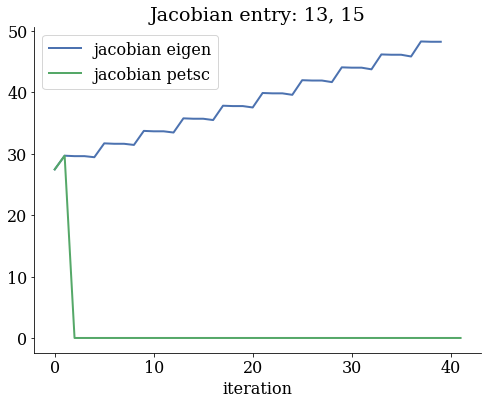

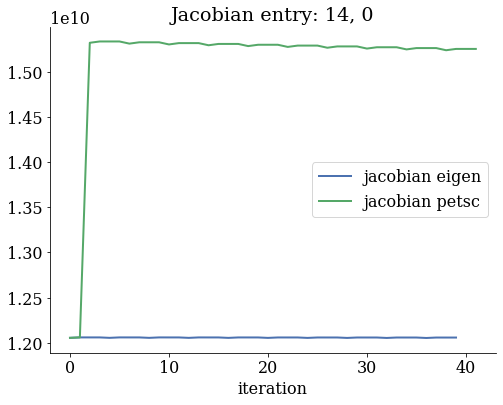

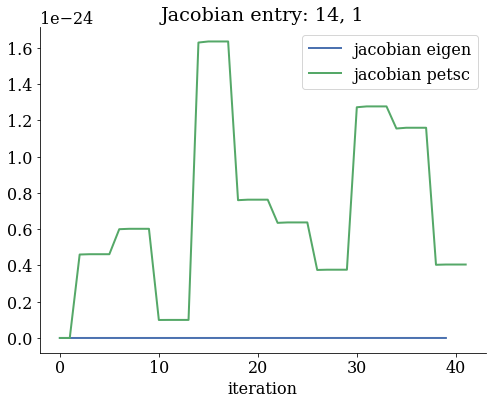

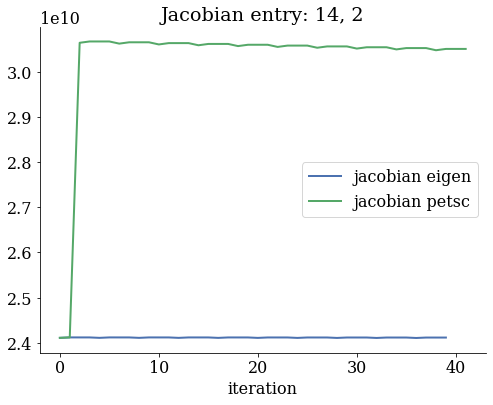

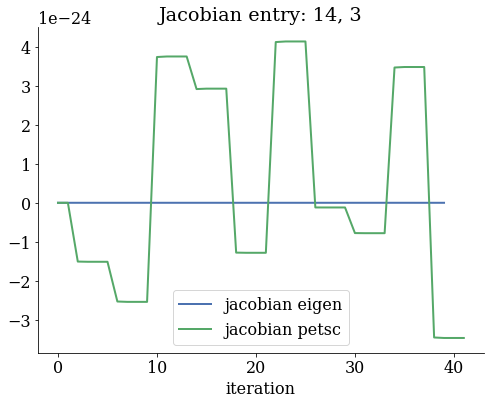

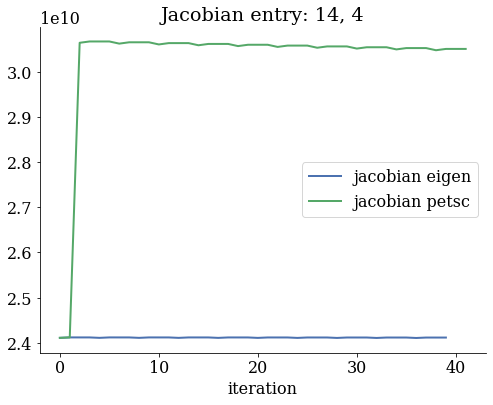

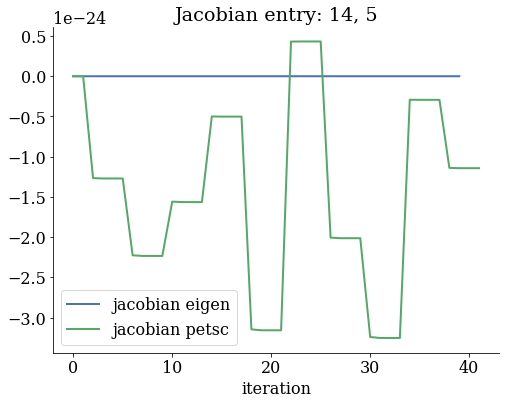

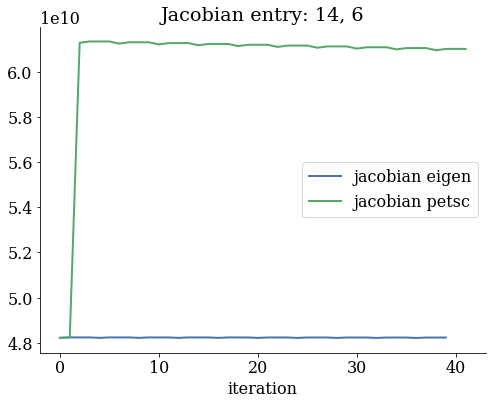

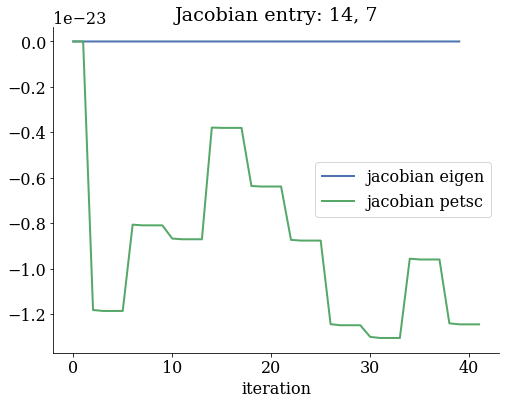

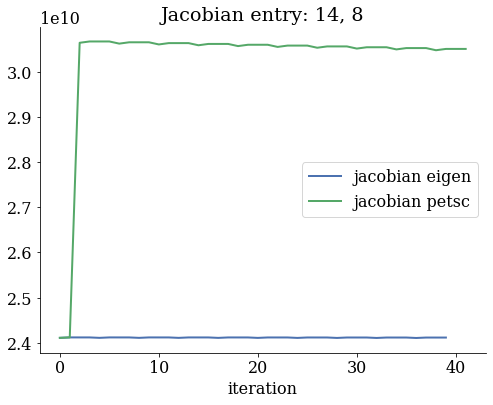

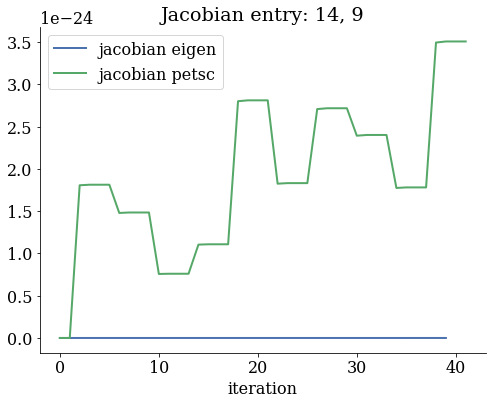

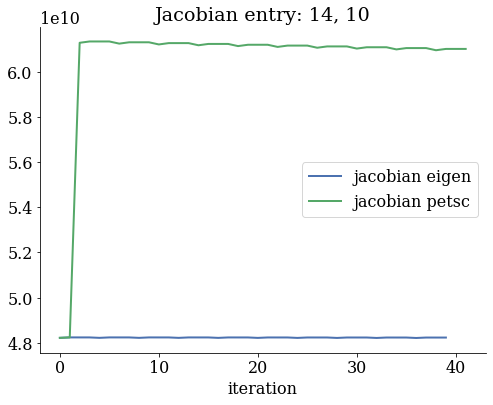

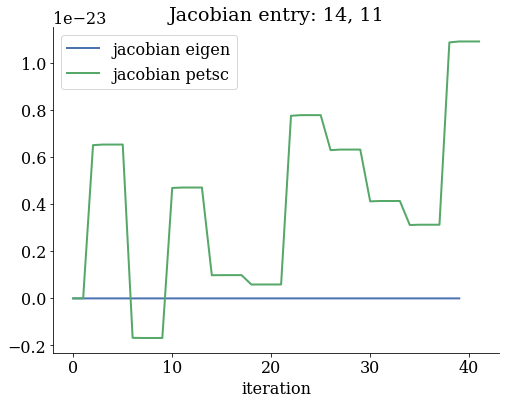

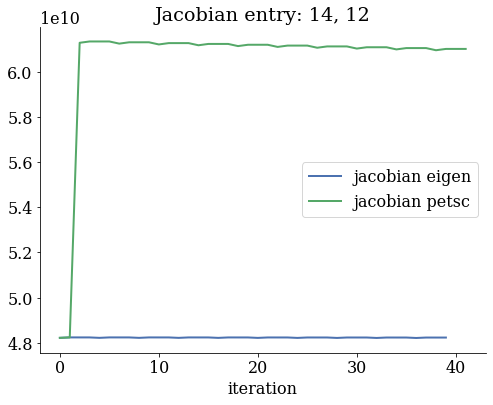

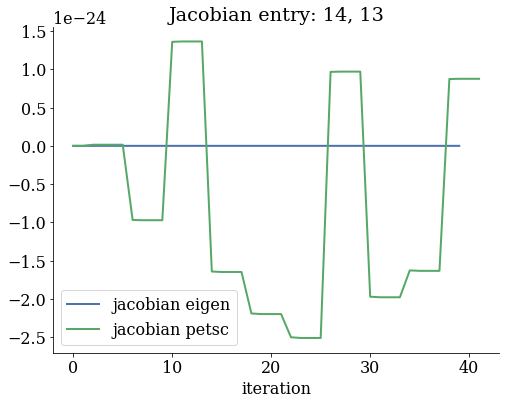

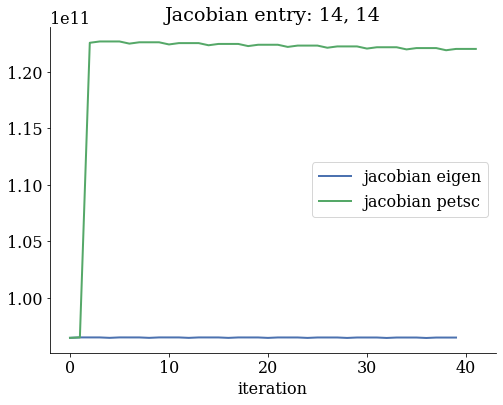

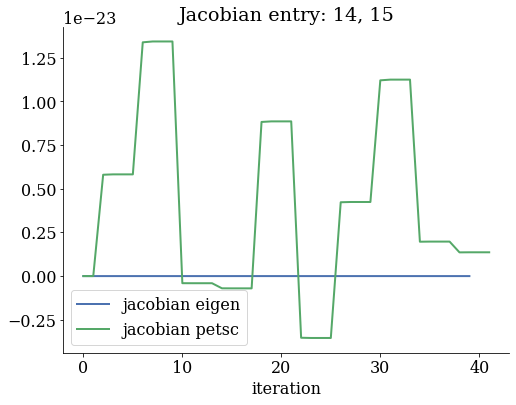

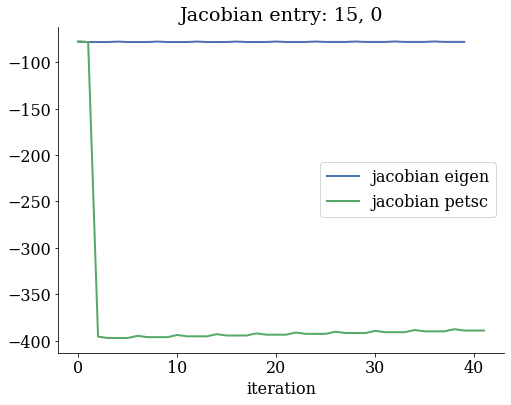

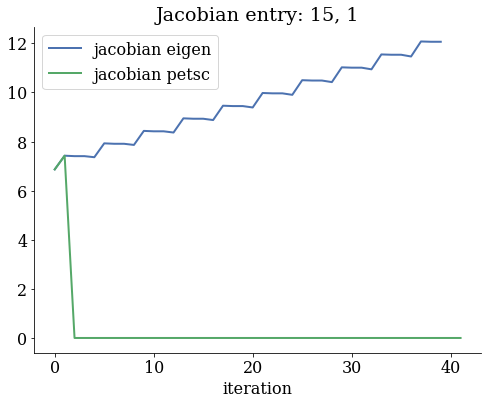

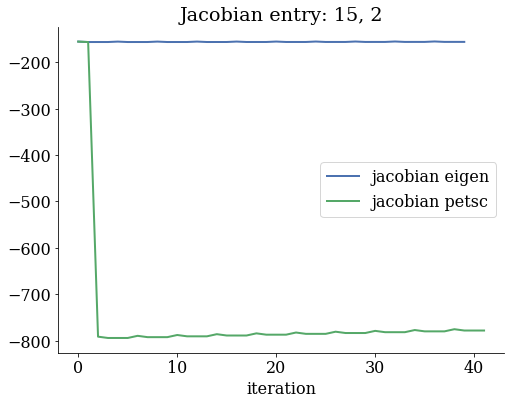

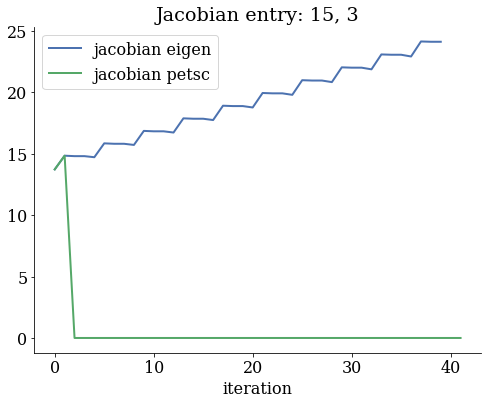

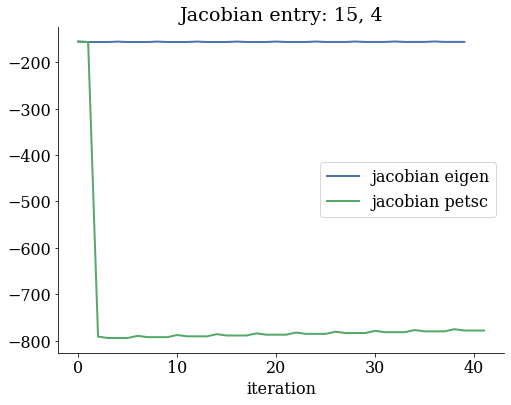

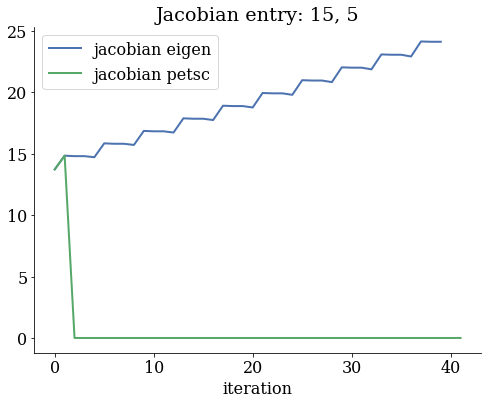

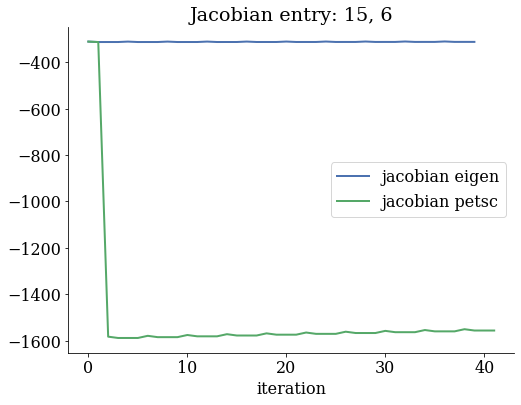

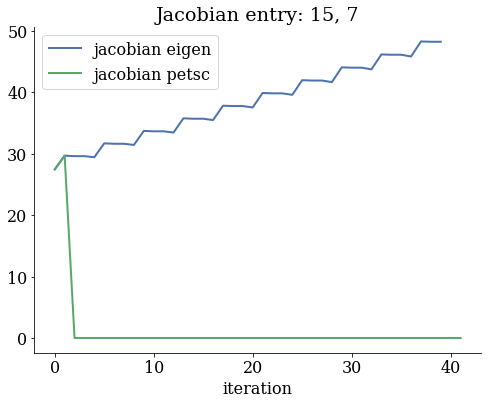

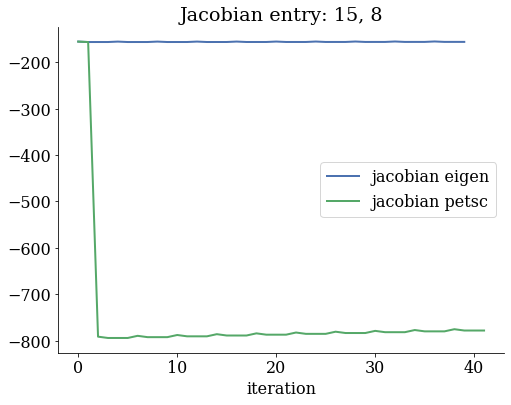

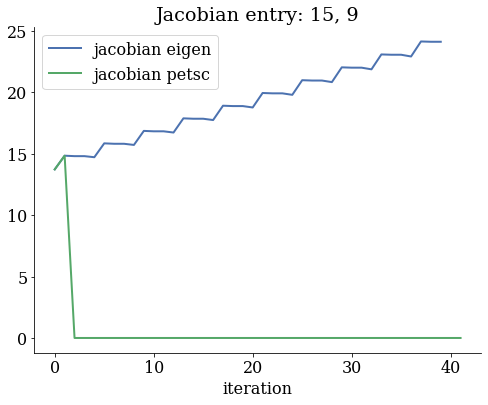

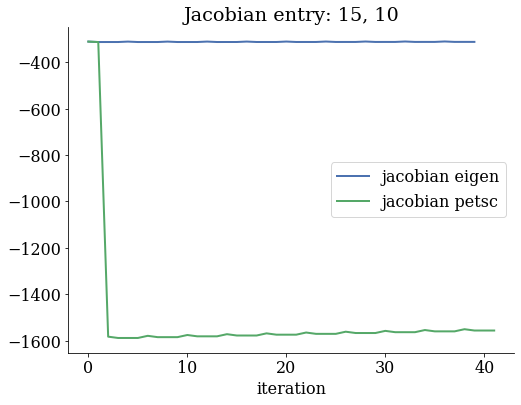

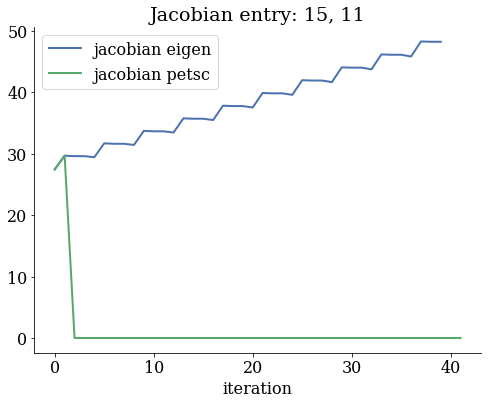

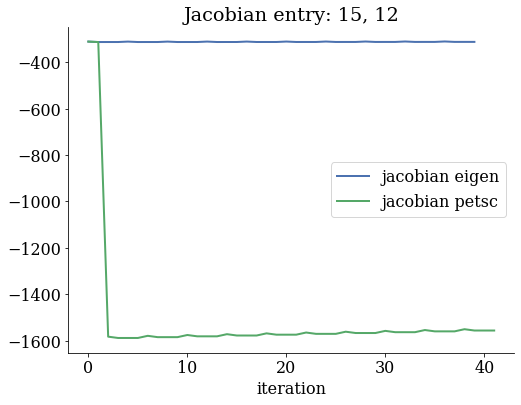

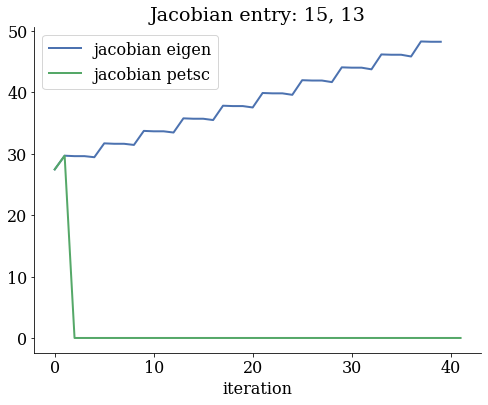

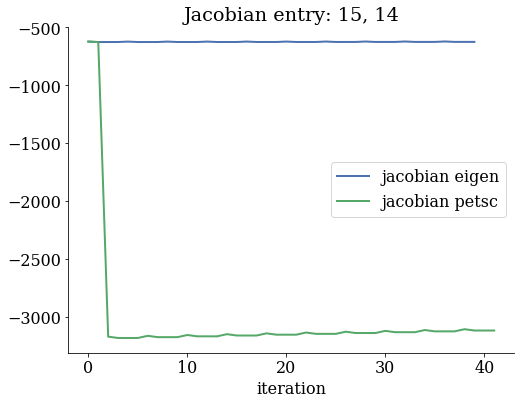

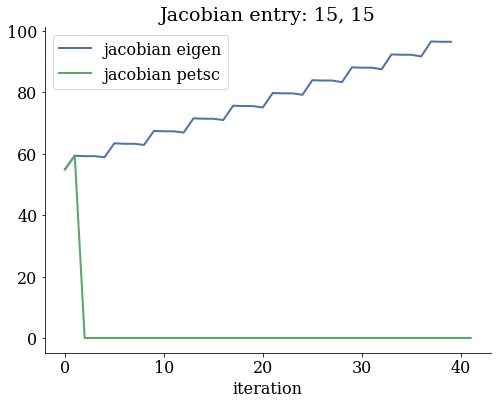

In [72]:
for i in range(16):
    for j in range(16):
        plt.title(f"Jacobian entry: {i}, {j}")
        plt.plot(jac_eigen[i][j], label="jacobian eigen")
        plt.plot(jac_petsc[i][j], label="jacobian petsc")
        plt.legend()
        plt.xlabel("iteration")
        plt.show()

0.243